# Machine Learning
#### By Jonathan L. Moran (jo6155mo-s@student.lu.se)
From the EDAF70 - Applied Artificial Intelligence course given at Lunds Tekniska Högskola (LTH) | Vt1 2019.

## Objectives
1. Write a linear regression program using gradient descent.
2. Write linear classifiers using the perceptron algorithm and logistic regression.
3. Experiment with variations of the algorithms.
4. Evaluate your classifier.

## Overview
Gradient descent is a basic technique to estimate linear discriminate functions. You will first use the gradient descent method to implement linear regression. You with then program the perceptron algorithm. Finally, you will improve the threshold function with the logistic curve. You will try various configurations and study their influence on the learning speed and accuracy.

## Background
#### Fitting equations
In two-dimensional space, the straight line fitting the data set is given by $$\hat{y} = mx + b,$$
where the objective of regression is to find the weights that minimise the loss between:
*  The set of $q$ observations: ${\{(x_i, y_i)\}}_{i=1}^{q}$ and
*  A perfect linear alignment: ${\{(x_i, f(x_i))\}}_{i=1}^{q}$, where $f(x_i) = mx_i + b$.

The loss is traditionally modelled by the quadratic error (Legendre 1805):
$$L_2 = \sum_{\text{Set of points}} (y - \hat{y})^2.$$

For $q$ points $(x_i, y_i)$:
$$Loss(m, b) = \sum_{i=1}^{q}(y_i - (mx_i + b))^2.$$

#### Minimising the loss
The loss function is convex and has a unique minimum. The loss function reaches a minimum when the partial derivitives are:

$$ \frac{\partial Loss}{\partial m} = \sum_{i=1}^{q}\frac{\partial}{\partial m}(y_i - (mx_i + b))^2 = -2\sum_{i=1}^{q}x_i(y_i - (mx_i + b)) = 0 $$
$$ \frac{\partial Loss}{\partial b} = \sum_{i=1}^{q}\frac{\partial}{\partial b}(y_i - (mx_i + b)^2 = -2\sum_{i=1}^{q}(y_i - (mx_i + b)) = 0 $$


which yields

$$ b = \bar{y} - m\bar{x} $$
$$ \sum_{i=1}^{N} x_iy_i - m \sum_{i=1}^{q} x_i^2 - qb \bar{x} = \sum_{i=1}^{q}x_iy_i - m\sum_{i=1}^{q}x_i^2-q\bar{x}(\bar{y} - m\bar{x}) = 0$$

where

$$ m = \frac{\sum_{i=1}^{q}x_iy_i - q\bar{x}\bar{y}}{\sum_{i=1}^{q}x_i^2 - q\bar{x}^2} \qquad \text{and} \qquad b = \bar{y} - m\bar{x},$$

with

$$ \bar{x} = \frac{1}{q} \sum_{i=1}^{q}x_i, \qquad \text{and} \qquad \bar{y} = \frac{1}{q}\sum_{i=1}^{q} y_i.$$

## Programming

In [1]:
### Required modules
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import random
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

In [2]:
# Locations of Salammbô data set
file_path_fr = 'https://raw.githubusercontent.com/pnugues/ilppp/master/programs/ch04/salammbo/salammbo_a_fr.tsv'
file_path_en = 'https://raw.githubusercontent.com/pnugues/ilppp/master/programs/ch04/salammbo/salammbo_a_en.tsv'

In [3]:
### From P. Nugues` `datasets.py`
# Credit: https://github.com/pnugues/ilppp/blob/master/programs/ch04/python/datasets.py

In [4]:
def read_array_from_tsv(file_path):
    """
    Read a tsv file. The response is the last column
    :param file_path:
    :return: X, y as np.array
    """
    
    observations = open(file_path).read().strip().split('\n')
    observations = [list(map(float, obs.split())) for obs in observations]
    X = np.array(observations)[:, :-1]
    X = np.hstack((np.ones((len(X), 1)), X))
    y = np.array(observations)[:, -1]
    return X, y


def read_tsv(file_path):
    """
    Read a tsv file. The response is the last column
    :param file_path:
    :return: X, y as lists
    """
    
    observations = open(file_path).read().strip().split('\n')
    observations = [[1] + list(map(float, obs.split())) for obs in observations]
    X = [obs[:-1] for obs in observations]
    y = [obs[-1] for obs in observations]
    return X, y


def load_tsv(file):
    observations = urlopen(file).read().decode('utf-8').strip().split('\n')
    observations = [[1] + list(map(float, obs.split())) for obs in observations]
    X = [obs[:-1] for obs in observations]
    y = [obs[-1] for obs in observations]
    return X, y

In [5]:
### Loading the Salammbô datasets in French and English
X_fr, y_fr = load_tsv(file_path_fr)
X_en, y_en = load_tsv(file_path_en)

In [6]:
### From P. Nugues` `gradient_descent_numpy.ipynb`
# Credit: https://github.com/pnugues/ilppp/blob/master/programs/ch04/python/gradient_descent_numpy.ipynb

In [7]:
def compute_sse(X, y, w):
    """Function to compute the sum of squared errors.
    Determines the deviation (amount of variation) between the predicted data
    y_hat and the actual data y.
    For a linear function y_hat = mx + b, we compute:
    \sum(y_hat - y)^2 for all the values of m and b.

    :param X: The input matrix: The predictors.
    :param y: The output vector: The response.
    :param w: The weight vector: The model.
    :return: The error.
    """
    
    error = y - X @ w
    return error.T @ error

In [8]:
### From P. Nugues` `visualize_sse.ipynb`
# Credit: https://github.com/pnugues/ilppp/blob/master/programs/ch04/python/visualize_sse.ipynb

In [9]:
def compute_3d_matrices(X, y):
    """
    Compute the 3D matrix of errors
    Axes x and y, the weights
    Axis z the error
    :param X: The input matrix: The predictors.
    :param y: The output vector: The response.
    :return:
    """

    w0_range = np.linspace(-1000, 1000, 100)
    w1_range = np.linspace(0, 0.15, 100)
    x_axis, y_axis = np.meshgrid(w0_range, w1_range)
    z_axis = np.array([math.log10(compute_sse(X, y, [w0, w1]))
                       for w0 in w0_range for w1 in w1_range])
    z_axis = z_axis.reshape(x_axis.shape)
    return x_axis, y_axis, z_axis

def plot_surfaces(X, y, color):
    """Plotting the surfaces.
    
    :param X: The input matrix: The predictors.
    :param y: The output vector: The response.
    :param color:
    """
    
    X, Y, Z = compute_3d_matrices(X, y)
    surf = ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=color,
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)

In [10]:
### From P. Nugues `visualize_inequalities2.py`
# Credit: https://github.com/pnugues/ilppp/blob/master/programs/ch04/python/visualize_inequalities2.py

In [11]:
# Drawing inequalities in two chapters of Salammbô
def paint_half_plane(xr, yr, v, sign, color):
    zr = []
    for x in xr:
        z = []
        for y in yr:
            if sign * (np.dot([1, -x], v) - y) > 0:
                z.append(color)
            else:
                z.append(-200)
        zr.append(z)
    return zr

def draw_inequalities(file_path_fr, file_path_en, n_chapters=2):
    """Drawing inequalities in chapters of Salammbô.
    
    :param: file_path_fr: The file path to the raw Salammbô dataset in French.
    :param: file_path_en: The file path to the raw Salammbô dataset in English.
    :param: n_chapters: The number of chapters to compare: [0, n_chapters].
    """

    data_fr = urlopen(file_path_fr).read().decode('utf-8').strip().split('\n')
    data_en = urlopen(file_path_en).read().decode('utf-8').strip().split('\n')
    data_fr = [list(map(int, data_fr[i].split('\t')))[::-1] for i in range(len(data_fr))]
    data_en = [list(map(int, data_en[i].split('\t')))[::-1] for i in range(len(data_en))]
    xr = np.linspace(0.06, 0.07, 250)
    yr = np.linspace(-100, 100, 250)
    fig = plt.figure(figsize=(24,12))
    plt.xlim(0.06, 0.07)
    plt.ylim(-100, 100)

    data_fr = data_fr[0:n_chapters]
    data_en = data_en[0:n_chapters]
    if n_chapters == 2:
        xr = np.linspace(0.02, 0.12, 250)
        yr = np.linspace(-1500, 1000, 250)
        plt.xlim(0.02, 0.12)
        plt.ylim(-1500, 1000)

    random.seed(2)
    colors_fr = list(range(0, 15))
    colors_en = list(colors_fr)
    random.shuffle(colors_en)

    for i in [0, 1]:
        zr = paint_half_plane(xr, yr, data_fr[i], -1, colors_fr[i])
        zr = np.transpose(zr)
        plt.contourf(xr, yr, zr,
                     cmap=plt.cm.gray,
                     # levels=[0, 1],
                     origin=None,
                     alpha=0.6,
                     extend='both')
        zr = paint_half_plane(xr, yr, data_en[i], 1, colors_en[i])
        zr = np.transpose(zr)
        plt.contourf(xr, yr, zr,
                     cmap=plt.cm.gray,
                     # levels=[0, 1],
                     origin=None,
                     alpha=0.6,
                     extend='both')
    plt.title('Inequalities in charcter counts of chapters in Salammbô', fontsize=18)
    plt.show()

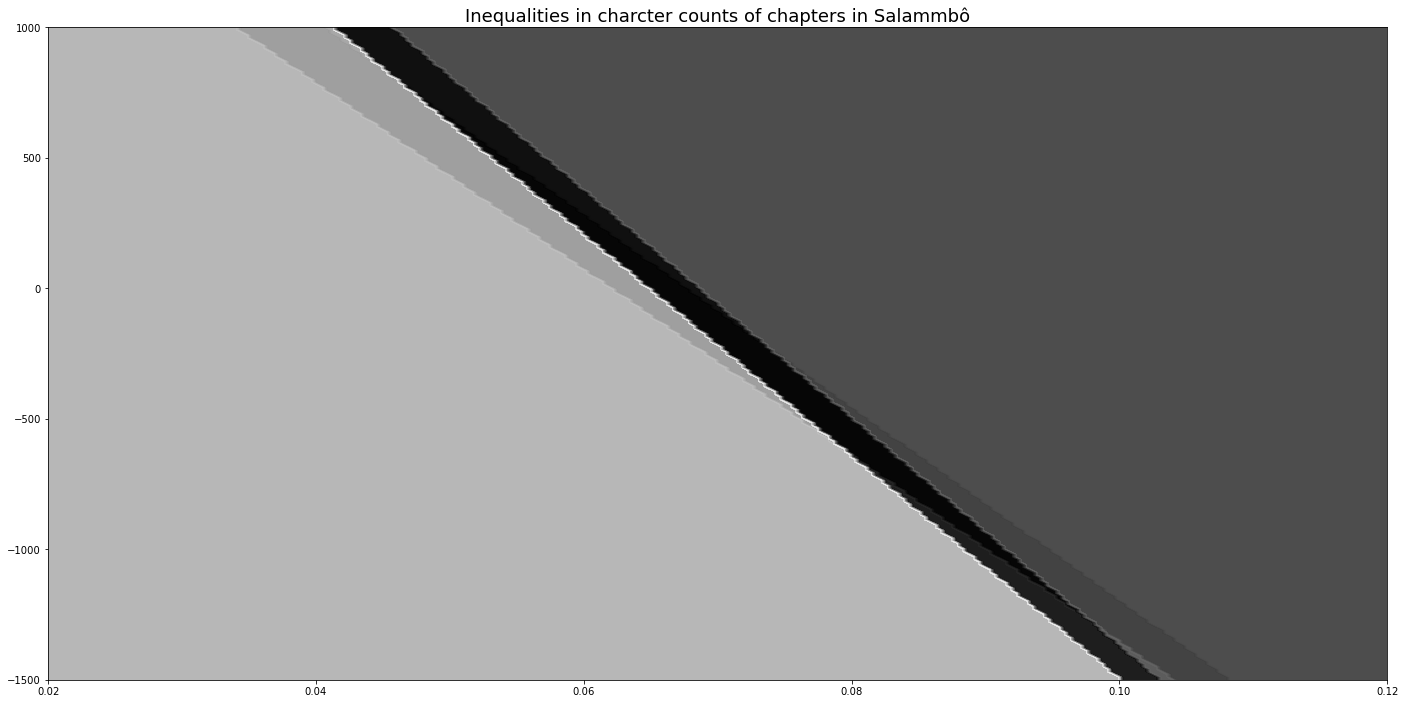

In [12]:
draw_inequalities(file_path_fr, file_path_en)

In [13]:
### From P. Nugues `visualize_counts.py`
# Credit: https://github.com/pnugues/ilppp/blob/master/programs/ch04/python/visualize_counts.py

In [14]:
def pair(stats):
    """
    Demux adjacent elements of a list
    :param stats:
    :return:
    """
    counts = stats.split()
    cnt_all = list(map(int, counts[0::2]))  # Letter count
    cnt_one = list(map(int, counts[1::2]))  # A count
    return cnt_all, cnt_one

def draw_counts(file_path_fr, file_path_en):
    """Draw counts of A letters across the chapters of Salammbô in French and English.
    
    :param: file_path_fr: The file path to the raw Salammbô dataset in French.
    :param: file_path_en: The file path to the raw Salammbô dataset in English.
    """
    stats_fr = urlopen(file_path_fr).read()
    stats_en = urlopen(file_path_en).read()
    # Scatterplot from categorical attributes
    fr_patch = patches.Patch(color='blue', label='French')
    en_patch = patches.Patch(color='orange', label='English')
    p = [fr_patch, en_patch]
    fig = plt.figure(figsize=(24,12))
    # Plot French data set
    (cnt_all, cnt_one) = pair(stats_fr)
    fr = plt.scatter(cnt_all, cnt_one, c='blue', s=35)
    # Plot English data set
    (cnt_all, cnt_one) = pair(stats_en)
    en = plt.scatter(cnt_all, cnt_one, c='orange', s=35)
    plt.title("Letter occurances in Salammbô (FR/EN)", fontsize=18)
    plt.xlabel("Count of all letters (per chapter)", fontsize=16)
    plt.ylabel("Letter count of 'A' (per chapter)", fontsize=16)
    plt.legend(handles=p, loc='lower right', fontsize='xx-large')
    plt.show()

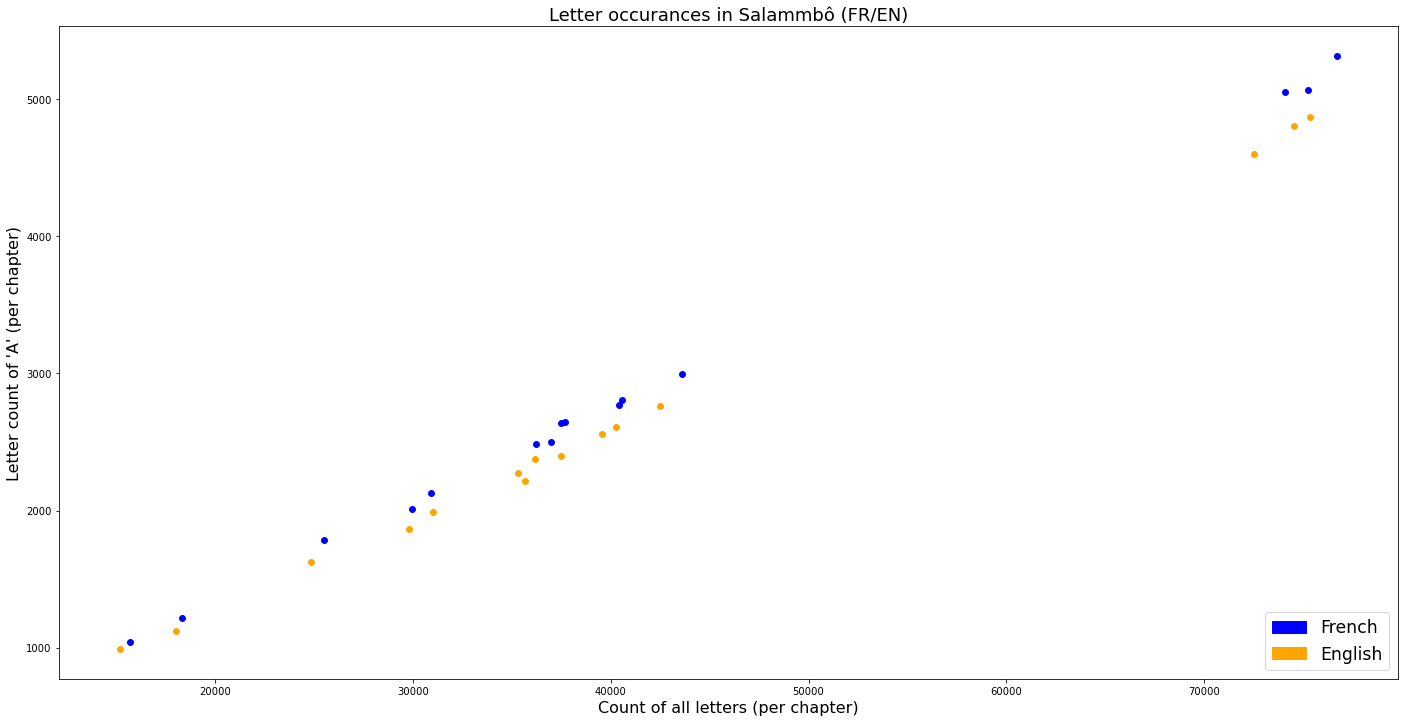

In [15]:
draw_counts(file_path_fr, file_path_en)

Here we see that our data set is linearly sepearable. There exists a line that separates the blue (`French`) from the orange (`English`) data points.

## 1. Linear Regression
_Implement the gradient descent method as explained in AIMA pp.719-720 and in the slides to compute regression lines. You will implement stochastic and batch versions of the algorithm._

#### Problem formulation
Here we write a method to fit a data set (regression) whose output is a real continous variable. 

#### Gradient descent (Cauchy, 1847)
Gradient descent is a numerical method to find the minimum of $f(x_0, x_1, x_2,...,x_n) = y$ when there is no analytical solution.

Let us denote $\textbf{x} = (x_0, x_1, x_2,...,x_n)$.

We derive successive approximations to find the minimum of $f$:
$$f(x_1) > f(x_2) > ... > f(x_k) > f(x_{k+1}) > ... > min$$.

Points in the neighbourhood of $x$ are defined by $x+v$ with $\Vert v \Vert$ small.

Given $x$, find $v$ subject to $f(x) > f(x + v)$

Using a Taylor expansion: $f(x + v) = f(x) + v \cdot \triangledown f(x) + ...$

The gradient is a direction vector corresponding to the steepest slope:

$$\triangledown f(x_0, x_1, x_2,...,x_n) = (\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},..., \frac{\partial f}{\partial x_n}).$$

$f(x+v)$ reaches a minimum or a maximum when $v$ and $\triangledown f(x)$ are colinear:
*  Steepest ascent: $v = \alpha\triangledown f(x)$,
*  Steepest descent: $v = -\alpha\triangledown f(x)$,
where $\alpha > 0$.

We have then: $f(x-\alpha\triangledown f(x)) \approx f(x) - \alpha {\Vert \triangledown f(x) \Vert}^2$.

The inequality:
$$f(x) > f(x - \alpha\triangledown f(x))$$
enables us to move one step down to the minimum.

We then use the iteration:
$$x_{k+1} = x_k - \alpha_{k} \triangledown f(x_k).$$


#### Pseudocode
For a data set $DS$, we find the minimum through a walk (iteration) down the surface.
![Gradient descent in psuedocode (P. Nugues, 2019).](https://docs.google.com/uc?export=download&id=1_zYpz7WzNucGcik2Yskg5qOPLv2iI-EB)
$$ $$

#### In a Two-dimensional Space
To make generalisation easier, let us rename the straight line coefficients $(b, m)$ as $(w_0, w_1)$.

Given a data set $DS$ of $q$ examples: $DS = \{(1, x_1^j, y^j)\vert j:1..q\}$, where the error is defined as:
$$SSE(w_0, w_1) = \sum_{j=1}^{q}(y^j - \hat{y}^j)^2 = \sum_{j=1}^{q}(y^j - (w_0 + w_1x_1^j))^2.$$

The gradient with $q$ examples:
$$\frac{\partial SSE}{\partial w_0} = -2\sum_{j=1}^{q}(y^j - (w_0 + w_1x_1^j))$$
$$\frac{\partial SSE}{\partial w_1} = -2\sum_{j=1}^{q}x_1^j \times (y^j - (w_0 + w_1x_1^j)).$$

In the general case, we want to find the regression hyperplane:
$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$
given the data set of $q$ examples where the loss is defined as:
$$Loss(w_0, w_1, ...,w_n) = \sum_{j=1}^{q}(y^j - \hat{y}^j)^2 = \sum_{j=1}^{q}(y^j - (w_0 + w_1x_1^j + w_2x_2^j +...+ w_nx_n^j))^2.$$
We introduce $x_0 = 1$ and we compute the gradient to determine the slope:
$$\frac{\partial Loss}{\partial w_i} = -2\sum_{j=1}^{q}x_i^j \times (y^j - (w_0x_o^j + w_1x_1^j + w_2x_2^j +...+ w_nx_n^j)).$$

The analytical solution to linear regression in two-dimensional space is then:
$$m = \frac{\sum_{i=1}^{q}x_iy_i - q\bar{x}\bar{y}}{\sum_{i=1}^{q}x_i^2-q\bar{x}^2} \qquad \qquad \text{and} \qquad \qquad b = \bar{y} - m\bar{x}.$$
This can be generalised for any dimension.

Let $X = (x^1; x^2; ...;x^q)$ be our observations and $y$, the output. We have:
$$Xw = \hat{y}.$$

We minimise the sum of squared errors with:
$$w = \left(X^TX \right)^{-1}X^Ty,$$
where $\left(X^TX \right)^{-1}X^T$ is called the psuedo-inverse.

#### Inverting $X^TX$
Assuming $X^TX$ may be similar, we have the property:
$$X^TX$$ is invertible if $X$ has linearly independent columns.
This means that: singular matrices occur with highly correlated features (or duplicate ones).

A way to solve it is to add a scalar matrix (Hoerl, 1962):
$$w = \left(X^TX + \lambda I\right)^{-1}X^Ty,$$
which is equivalent to adding the term $\lambda \left\Vert w \right\Vert^2$ to the sum of squared errors (SSE). This process is called a regularisation. It is also used in classification.

--

On the other hand, we could perform line fitting (linear regression) to separate classes inside a data set (discriminate analysis, classification). The output is a discrete set of symbols, the classes, for instace `{0, 1}` or `{negative, positive}`.

#### Analytical solution of linear regression
Computing a regression using pseudo-inverse matrices.

In [16]:
### From P. Nugues` `analytical_regression.ipynb`
# Credit: https://github.com/pnugues/ilppp/blob/master/programs/ch04/python/analytical_regression.ipynb

In [17]:
# Psuedo-inverse with a Numpy `matrix`
def regression_matrix(X, y, reg=0.0):
    """
    Computes the regression using numpy matrices
    :param X: The input matrix: The predictors.
    :param y: The output vector: The response.
    :param reg: The regularization factor.
    :return: weights, ŷ, se, sse
    """
    if reg != 0.0:
        print('Regularized')
    I = np.identity(X.shape[1])
    w = (X.T * X + reg * I).I * X.T * y
    y_hat = X * w
    se = np.square(y_hat - y)
    sse = (y_hat - y).T * (y_hat - y)
    return w, y_hat, se, sse

# Psuedo-inverse with a Numpy `array`
def regression_array(X, y, reg=0.0):
    """
    Computes the regression using numpy arrays
    :param X: The input array: The predictors.
    :param y: The output vector: The response.
    :return: weights, ŷ, sse
    """
    if reg != 0.0:
        print('Regularized')
    I = np.identity(X.shape[1])
    w = (np.linalg.inv(X.T @ X + reg * I) @ X.T) @ y
    # Or directly with pinv()
    # w = np.linalg.pinv(X) @ y
    y_hat = X @ w
    se = (y_hat - y) * (y_hat - y)
    sse = (y_hat - y).T @ (y_hat - y)
    return w, y_hat, se, sse

In [18]:
def compute_regression_array(stat_en, stat_fr):
    """Performs regression analysis using `array`."""
    fig = plt.figure(figsize=(24,12))
    for i, stats in enumerate([stat_en, stat_fr]):
        x_l = stats[:, 1]
        y_l = stats[:, -1]
        lang[i] = plt.scatter(x_l, y_l, color=pattern[i][0], marker=pattern[i][1], s=95)
        X = stats[:, :-1]
        y =stats[:, -1:]
        w, y_hat, se, sse = regression_array(X, y)
        print('Language:', i)
        print('X:', X)
        print('y:', y)
        print('ŷ:', y_hat)
        print('Squared errors:', se)
        print("Weights", w.T)
        print("SSE", sse)
        plt.plot([min(x_l), max(x_l)],
                [([1, min(x_l)] @ w), ([1, max(x_l)] @ w)],
                color=pattern[i][0])
    en_patch = patches.Patch(color=pattern[0][0], label='English')
    fr_patch = patches.Patch(color=pattern[1][0], label='French')
    p = [en_patch, fr_patch]
    plt.title("Salammbô")
    plt.xlabel("Letter count")
    plt.ylabel("A count")
    plt.legend(handles=p, loc='lower right', scatterpoints=1, fontsize='xx-large')
    plt.show()

def compute_regression_matrix(stat_en, stat_fr):
    """Performs regression analysis using `matrix`."""
    fig = plt.figure(figsize=(24,12))
    for i, stats in enumerate([stat_en, stat_fr]):
        x_l = stats[:, 1]
        y_l = stats[:, -1]
        lang[i] = plt.scatter(x_l, y_l, color=pattern[i][0], marker=pattern[i][1], s=95)
        X = np.matrix(stats[:, :-1])
        y = np.matrix(stats[:, -1:])
        w, y_hat, se, sse = regression_matrix(X, y)
        print('Language:', i)
        print('X:', X)
        print('y:', y)
        print('ŷ:', y_hat)
        print('Squared errors:', se)
        print("Weights", w.T)
        print("SSE", sse)
        w = np.array(w)
        plt.plot([min(x_l), max(x_l)],
                [([1, min(x_l)] @ w), ([1, max(x_l)] @ w)],
                color=pattern[i][0])
    en_patch = patches.Patch(color=pattern[0][0], label='English')
    fr_patch = patches.Patch(color=pattern[1][0], label='French')
    p = [en_patch, fr_patch]
    plt.title("Salammbô regression line")
    plt.xlabel("Letter count")
    plt.ylabel("A count")
    plt.legend(handles=p, loc='lower right', scatterpoints=1, fontsize='xx-large')
    plt.show()

In [19]:
### Fetch Salammbô data sets
stat_en = urlopen(file_path_en).read()
stat_fr = urlopen(file_path_fr).read()

### Reshape data sets into column vectors corresponding to [[letter_count], [A_count]]
stat_en = np.array(pair(stat_en)).T
stat_fr = np.array(pair(stat_fr)).T

In [20]:
### Stack the arrays in sequence horizontally (column-wise)
stat_en = np.hstack((np.ones((stat_en.shape[0],1)), stat_en))
stat_fr = np.hstack((np.ones((stat_fr.shape[0],1)), stat_fr))

Language: 0
X: [[1.0000e+00 3.5680e+04]
 [1.0000e+00 4.2514e+04]
 [1.0000e+00 1.5162e+04]
 [1.0000e+00 3.5298e+04]
 [1.0000e+00 2.9800e+04]
 [1.0000e+00 4.0255e+04]
 [1.0000e+00 7.4532e+04]
 [1.0000e+00 3.7464e+04]
 [1.0000e+00 3.1030e+04]
 [1.0000e+00 2.4843e+04]
 [1.0000e+00 3.6172e+04]
 [1.0000e+00 3.9552e+04]
 [1.0000e+00 7.2545e+04]
 [1.0000e+00 7.5352e+04]
 [1.0000e+00 1.8031e+04]]
y: [[2217.]
 [2761.]
 [ 990.]
 [2274.]
 [1865.]
 [2606.]
 [4805.]
 [2396.]
 [1993.]
 [1627.]
 [2375.]
 [2560.]
 [4597.]
 [4871.]
 [1119.]]
ŷ: [[2290.67191078]
 [2730.10675161]
 [ 971.33856803]
 [2266.10882778]
 [1912.58047617]
 [2584.85019536]
 [4788.90463484]
 [2405.38536645]
 [1991.67103136]
 [1593.83910859]
 [2322.30813286]
 [2539.64640649]
 [4661.13802249]
 [4841.63167164]
 [1155.81889557]]
Squared errors: [[5.42755044e+03]
 [9.54392796e+02]
 [3.48249043e+02]
 [6.22705990e+01]
 [2.26390171e+03]
 [4.47314236e+02]
 [2.59060780e+02]
 [8.80851033e+01]
 [1.76615763e+00]
 [1.09964472e+03]
 [2.77643286e+0

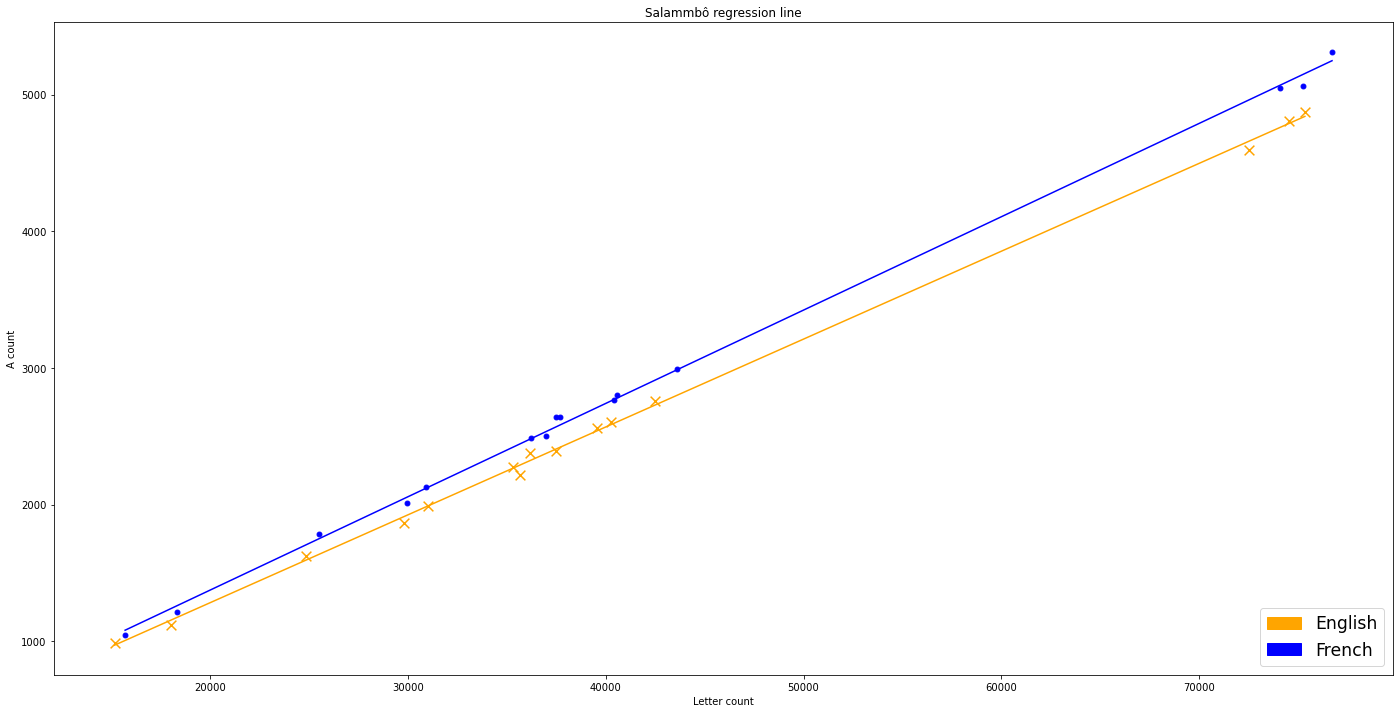

In [21]:
### Computing the regression
pattern = [('orange', 'x'), ('blue', '.')]
lang = [None] * 2
compute_regression_matrix(stat_en, stat_fr)

In [22]:
### Singular Matrix

In [23]:
def regularisation_singular(stat_fr_sing, reg=0.0):
    print('Trying regularization with a singular matrix')
    # Creation of a singular matrix by duplicating a column
    X = np.array(stat_fr_sing)[:, :-1]
    y = np.array(stat_fr_sing)[:, -1]
    try:
        compute_regression_array(X, y, reg)
    except:
        print(np.linalg.linalg.LinAlgError)
        print('Singular matrix: Could not be inverted.')

In [24]:
### Singular matrix
stat_fr_sing = np.hstack((stat_fr[:, :-1], stat_fr[:, -2:-1], stat_fr[:, -1:]))
regularisation_singular(stat_fr_sing)

Trying regularization with a singular matrix
<class 'numpy.linalg.LinAlgError'>
Singular matrix: Could not be inverted.


Returns $w$, $\hat{y}$, squared errors, and the sum of squared errors.

In [25]:
### Singular matrix with regularisation
regularisation_singular(stat_fr_sing, reg=0.01)

Trying regularization with a singular matrix
<class 'numpy.linalg.LinAlgError'>
Singular matrix: Could not be inverted.


In [26]:
### Psuedo-inverse with a Quasisingular Matrix
print('Trying regularization with a quasi singular matrix')
np.set_printoptions(precision=10)
X = np.array(stat_fr_sing)[:, :-1]
y = np.array(stat_fr_sing)[:, -1]
X[0][2] -= 0.000001
X, y

Trying regularization with a quasi singular matrix


(array([[1.0000000000e+00, 3.6961000000e+04, 3.6960999999e+04],
        [1.0000000000e+00, 4.3621000000e+04, 4.3621000000e+04],
        [1.0000000000e+00, 1.5694000000e+04, 1.5694000000e+04],
        [1.0000000000e+00, 3.6231000000e+04, 3.6231000000e+04],
        [1.0000000000e+00, 2.9945000000e+04, 2.9945000000e+04],
        [1.0000000000e+00, 4.0588000000e+04, 4.0588000000e+04],
        [1.0000000000e+00, 7.5255000000e+04, 7.5255000000e+04],
        [1.0000000000e+00, 3.7709000000e+04, 3.7709000000e+04],
        [1.0000000000e+00, 3.0899000000e+04, 3.0899000000e+04],
        [1.0000000000e+00, 2.5486000000e+04, 2.5486000000e+04],
        [1.0000000000e+00, 3.7497000000e+04, 3.7497000000e+04],
        [1.0000000000e+00, 4.0398000000e+04, 4.0398000000e+04],
        [1.0000000000e+00, 7.4105000000e+04, 7.4105000000e+04],
        [1.0000000000e+00, 7.6725000000e+04, 7.6725000000e+04],
        [1.0000000000e+00, 1.8317000000e+04, 1.8317000000e+04]]),
 array([2503., 2992., 1042., 2487., 20

Even if the matrix is not mathematically singular, we have an unstable result with very high weights and an astronomic loss.

In [27]:
# No regularisation
w, y_hat, se, sse = regression_array(X, y)
w, y_hat, se, sse

(array([ 1.3226473677e+09,  4.2694510686e+08, -4.2691951745e+08]),
 array([2.2684579035e+09, 2.4388829338e+09, 1.7242475368e+09,
        2.2497772087e+09, 2.0889221901e+09, 2.3612702594e+09,
        3.2483782663e+09, 2.2875983538e+09, 2.1133344853e+09,
        1.9748190199e+09, 2.2821733993e+09, 2.3564082719e+09,
        3.2189504471e+09, 3.2859946960e+09, 1.7913685540e+09]),
 array([5.1458899041e+18, 5.9481353706e+18, 2.9730259748e+18,
        5.0614862986e+18, 4.3635875021e+18, 5.5755839911e+18,
        1.0551928474e+19, 5.2330941359e+18, 4.4661736610e+18,
        3.8999031151e+18, 5.2083033699e+18, 5.5526469080e+18,
        1.0361609489e+19, 1.0797726232e+19, 3.2089969431e+18]),
 8.834809136927657e+19)

A small regularisation adds stability and results in a loss that is the same as with a nonsingular matrix.

In [28]:
# With regularisation
w, y_hat, se, sse = regression_array(X, y, reg=0.01)
w, y_hat, se, sse

Regularized


(array([8.5636391053, 0.0326285402, 0.0356675581]),
 array([2532.8557258994, 2987.707740174 , 1080.4026047909, 2482.9995742242,
        2053.6903007248, 2780.5656742301, 5148.1865117108, 2583.9412074141,
        2118.8447784401, 1749.157998699 , 2569.4624345885, 2767.5894155656,
        5069.6459987417, 5248.5817761149, 1259.5432704589]),
 array([8.9136436898e+02, 1.8423494414e+01, 1.4747600547e+03,
        1.6003406388e+01, 1.5753199716e+03, 5.9703627583e+02,
        7.4281148009e+03, 3.4879409817e+03, 5.1197195572e+01,
        1.2139650547e+03, 5.1176232650e+03, 2.5262418401e+00,
        5.1284125901e+02, 4.0218711207e+03, 1.9841029432e+03]),
 28393.09043453384)

### 1a. Stochastic gradient descent
With stochastic gradient descent, the updates are carried out one example at a time. Thus, our gradient (weight update) equation for $q$ examples becomes:
$$w_0 \leftarrow w_0 + \alpha \cdot (y^j - (w_0 + w_1x_1^j))$$
$$w_1 \leftarrow w_1 + \alpha \cdot x_1^j \cdot (y^j - (w_0 + w_1x_1^j)).$$

The iteration step of stochastic gradient descent represented in vector notation with $x^j$ and $y^j$ becomes:
$$w \leftarrow w + \alpha \cdot (y^j - x^j \cdot w) \cdot x^j.$$

The stochastic variant of gradient descent is also called online learning and 
is usually faster than batch gradient descent. An intermediate technique is to use mini batches of e.g., 32, 64 or 128 samples.

Note that a fixed learning rate $\alpha$ does not gaurantee converge; it may oscillate around the minimum without settling. In some cases, a schedule of decreasing learning rates (as in simulated annealing) does gaurantee convergence.

In [29]:
class LinearClassifier:
    
    def __init__(self, alpha=1.0, w=None, maxima=None, logs=None):
        self.alpha = alpha
        self.w = w
        self.maxima = maxima
        self.logs = logs
    
    def fit(self, X, y, alpha=1.0, w=None, epochs=10):
        raise NotImplementedError
        
    def predict(self, X, w):
        """Function to predict values.

        Peforms matrix multiplication of matrix X and vector y.

        :param X: The input matrix: The predictors.
        :param w: The weight vector: The model.
        :return:  
        """

        return X @ w

    def normalize(self, Xy):
        """Function to normalize the data.

        :param Xy: The dataset to normalise.
        :return: tuple: The normalised data set and its maxima.
        """

        maxima = np.amax(Xy, axis=0)
        D = np.diag(maxima)
        D_inv = np.linalg.inv(D)
        Xy = Xy @ D_inv
        return Xy, maxima

    def denormalize(self, X=None, y=None):
        """Function to de-normalize the data.

        :param Xy: The data to de-normalise.
        :return w or tuple: The normalised weight vector and data, if included.
        """

        maxima = self.maxima.reshape(-1, 1)
        w = maxima[-1, 0] * (self.w / maxima[:-1, 0:1])
        if X is not None and y is not None:
            X = [X[i][1] * maxima[1] for i in range(len(X))]
            y = [yi * maxima[2] for yi in y]
            return X, y, w
        else:
            return w
    
    def compute_sse(self, X, y, w):
        """Function to compute the sum of squared errors.

        Determines the deviation (amount of variation) between the predicted data
        y_hat and the actual data y.
        For a linear function y_hat = mx + b, we compute:
        \sum(y_hat - y)^2 for all the values of m and b.

        :param X: The input matrix: The predictors.
        :param y: The output vector: The response.
        :param w: The weight vector: The model.
        :return: The error.
        """

        error = y - X @ w
        return error.T @ error

In [30]:
class StochasticGradientDescent(LinearClassifier):

    def fit(self, X, y, alpha=1.0, w=None, epochs=10, batch_size=1, tol=1e-5, scale_data=False):
        """Performs stochastic gradient descent.
        
        Updates weights after considering a number of randomly-selected samples 
        in the data set.

        :param X: The observation matrix.
        :param y: The class vector.
        :param alpha: The learning rate.
        :param epochs: Number of full passes over the data set.
        :param batch_size: Number of samples to consider before a weight update.
        :param tol: The convergence threshold value.
        :param scale_data: Normalises the data set if True. 
        :return: w, the learned weight vector. 
        """

        self.alpha = alpha
        self.w = w
        self.tol = tol
        self.scale_data = scale_data
        self.logs = []
        self.logs_stoch = []
        if self.scale_data:
            X, x_max = self.normalize(X)
            y, y_max = self.normalize(y)
            self.maxima = np.concatenate((x_max, y_max))
        for epoch in range(1, int((X.shape[0] / batch_size)) * epochs):
            idxs = np.random.choice(np.arange(X.shape[0]), size=batch_size)
            for i in idxs:
                w_0 = self.w.copy()
                loss = y[i] - self.predict(X[i], self.w)[0]
                gradient = loss * np.array([X[i]]).T
                self.w = w_0 + self.alpha * gradient
                error = self.compute_sse(X, y, self.w)
                self.logs_stoch.extend((self.w, self.alpha, error))
            if np.linalg.norm(gradient) < self.tol:
                print("Epoch: ", epoch)
                break
            error = self.compute_sse(X, y, self.w)
            self.logs.extend((self.w, self.alpha, error))
        if self.scale_data:
            self.w = self.denormalize(self.w)
        return self.w

In [31]:
### Fetch Salammbô data sets
stat_fr = urlopen(file_path_fr).read()
stat_en = urlopen(file_path_en).read()

### Reshape data sets into column vectors corresponding to [[letter_count], [A_count]]
stat_fr = np.array(pair(stat_fr)).T
stat_en = np.array(pair(stat_en)).T

### Stack the arrays in sequence horizontally (column-wise)
# First column indicates language (0 for French, 1 for English)
stat_fr = np.hstack((np.zeros((stat_fr.shape[0],1)), stat_fr))
stat_en = np.hstack((np.ones((stat_en.shape[0],1)), stat_en))

In [32]:
### Split into data and target sets
X_fr, y_fr = stat_fr[:,[0,1]], stat_fr[:,2]
X_en, y_en = stat_en[:,[0,1]], stat_en[:,2]

In [33]:
### Prepping data
y_fr = np.array([y_fr]).T 
y_en = np.array([y_en]).T                             

In [34]:
### Parameters for stochastic gradient descent
scale_data = False                                      # Normalizes the data set if True
alpha = 1.0 if scale_data is True else 1e-10            # Learning rate
epochs = 100                                            # Complete passes over entire data set
batch_size = 1                                          # Number of examples to consider before a weight update
tol = 1e-10                                             # Convergence threshold

In [35]:
### Initialising weight vector
w = np.zeros(X_fr.shape[1]).reshape((-1, 1))

### Performing linear regression with SGD on French data set
sgd = StochasticGradientDescent()
w = sgd.fit(X_fr, y_fr, alpha, w, epochs, batch_size, tol, scale_data)

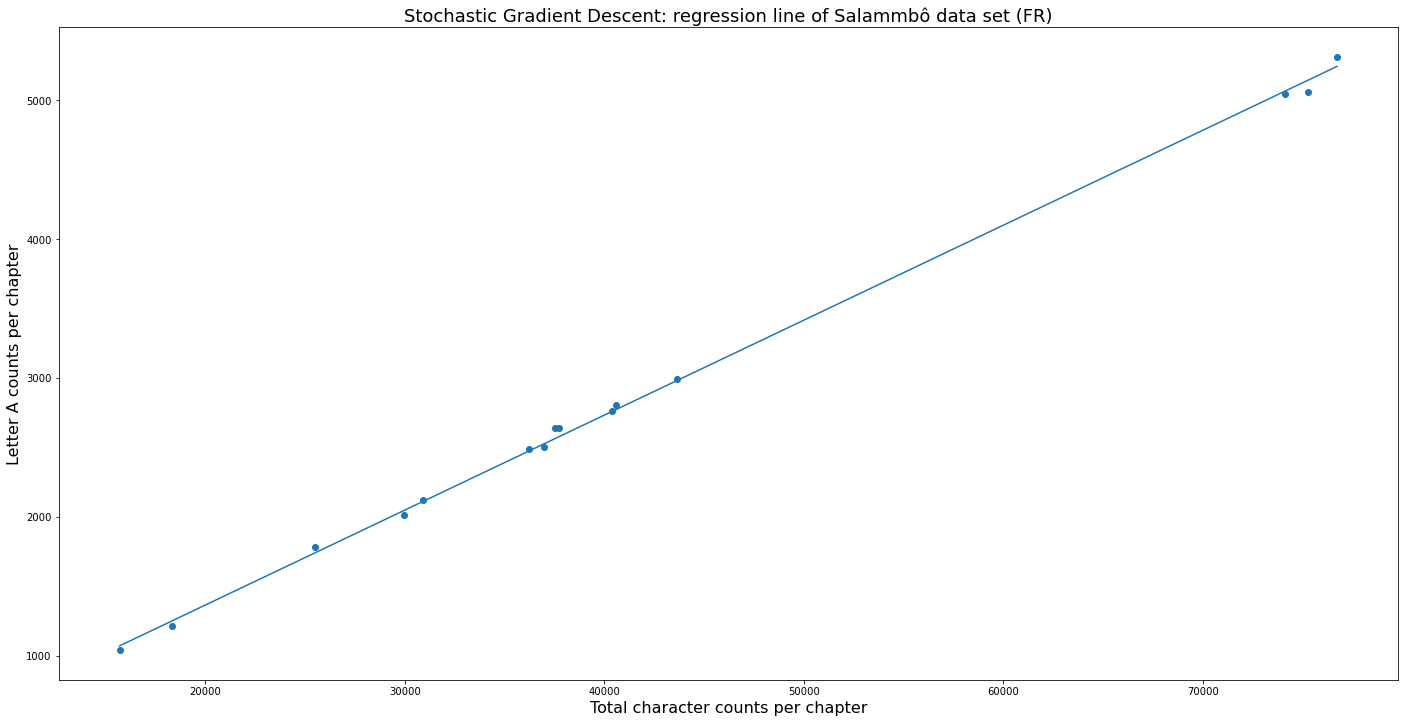

In [36]:
### Visualising the coordinates and the best-fit line of the French data set
X_fig = X_fr[:, 1]
y_fig = y_fr[:, 0]
fig = plt.figure(figsize=(24,12))
plt.scatter(X_fig, y_fig)
plt.plot([min(X_fig), max(X_fig)],
         [[1, min(X_fig)] @ w, [1, max(X_fig)] @ w])
plt.title('Stochastic Gradient Descent: regression line of Salammbô data set (FR)', fontsize=18)
plt.xlabel('Total character counts per chapter', fontsize=16)
plt.ylabel('Letter A counts per chapter', fontsize=16)
plt.show()

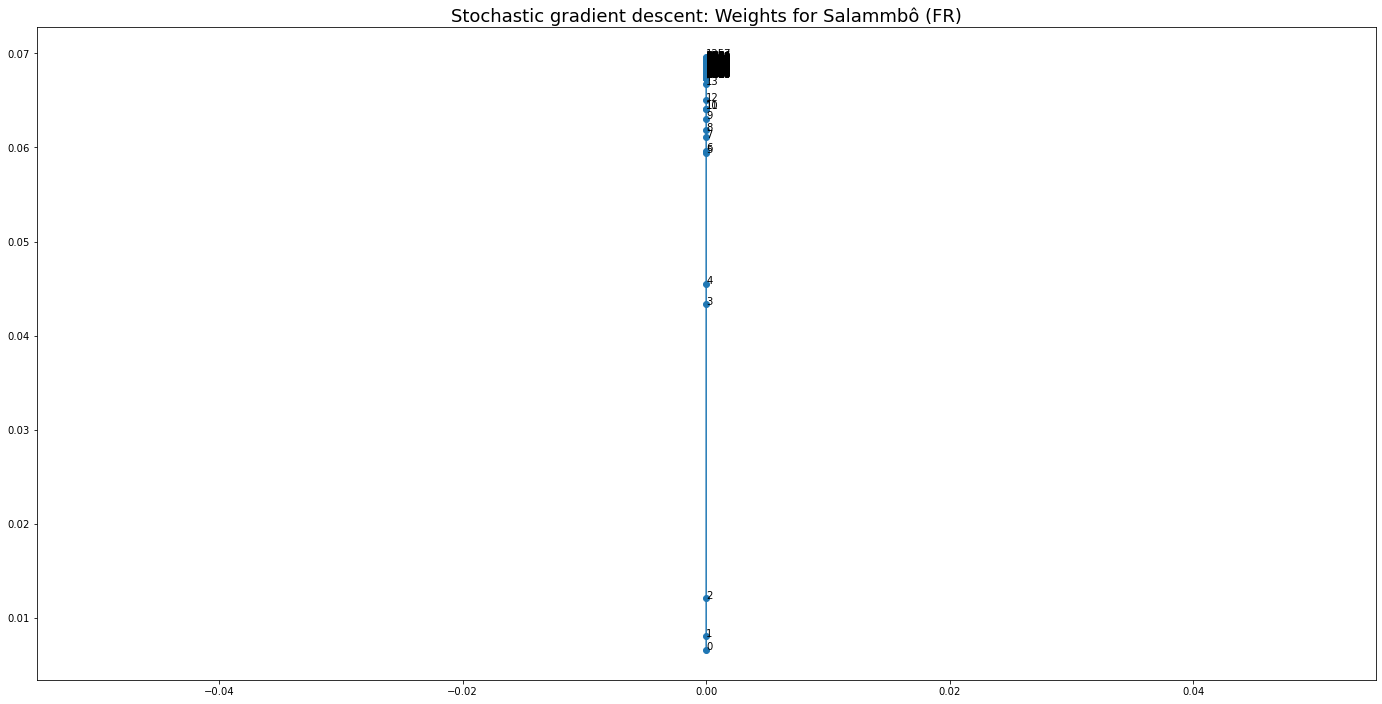

In [37]:
### Plotting weight updates by epoch
logs = sgd.logs
fig = plt.figure(figsize=(24,12))
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title('Stochastic gradient descent: Weights for Salammbô (FR)', fontsize=18)
plt.show()

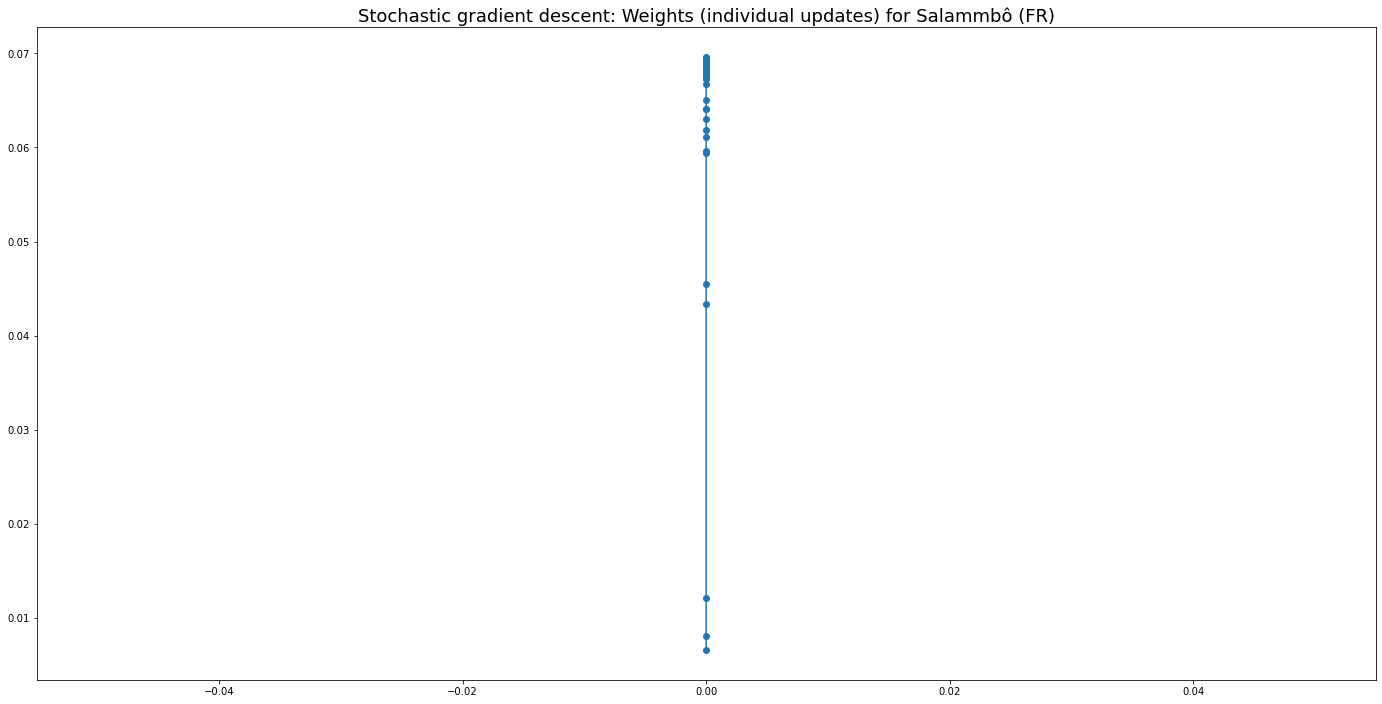

In [38]:
### Plotting weight updates by individual updates
logs = sgd.logs_stoch
fig = plt.figure(figsize=(24,12))
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])),
         marker='o')
plt.title('Stochastic gradient descent: Weights (individual updates) for Salammbô (FR)', fontsize=18)
plt.show()

In [39]:
### Initialising weight vector
w = np.zeros(X_en.shape[1]).reshape((-1, 1))

### Performing linear regression with SGD on English data set
sgd = StochasticGradientDescent()
w = sgd.fit(X_en, y_en, alpha, w, epochs, batch_size, tol, scale_data)

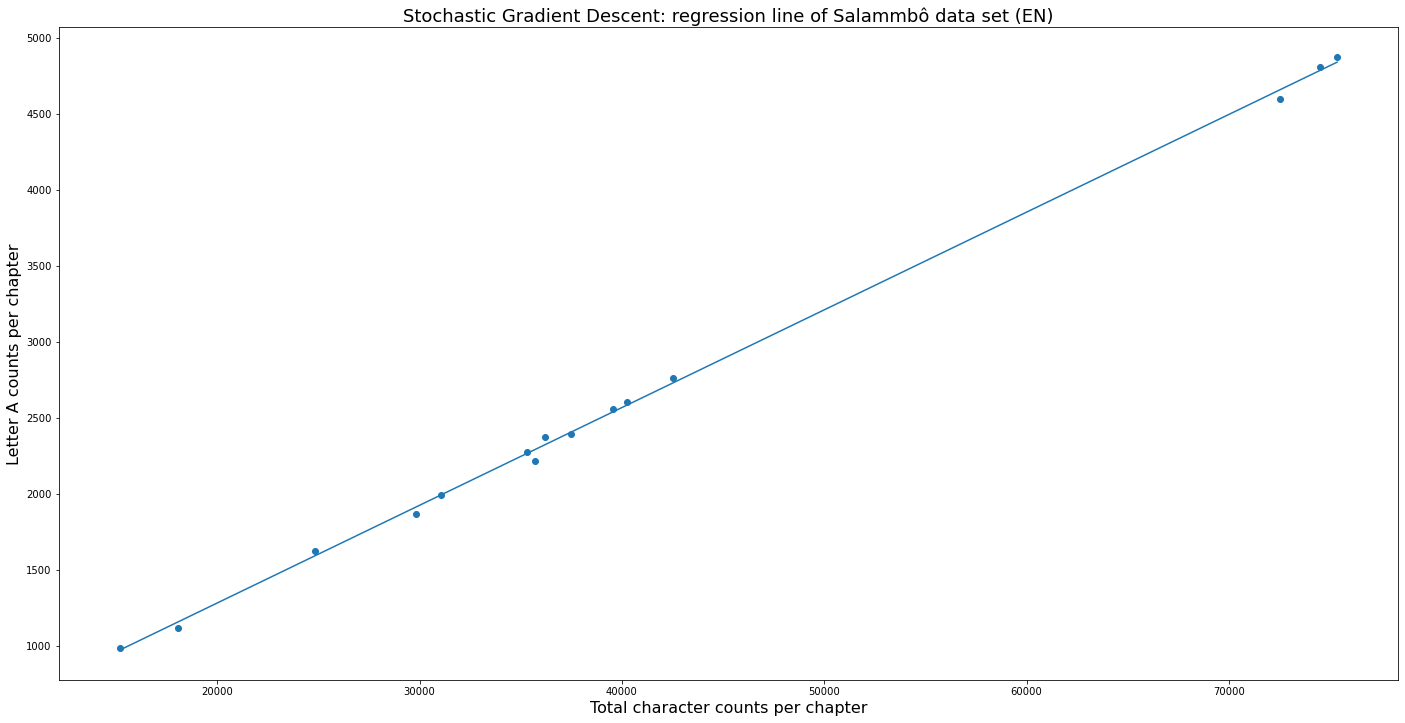

In [40]:
### Visualising the coordinates and the best-fit line of the English data set
X_fig = X_en[:, 1]
y_fig = y_en[:, 0]
fig = plt.figure(figsize=(24,12))
plt.scatter(X_fig, y_fig)
plt.plot([min(X_fig), max(X_fig)],
         [[1, min(X_fig)] @ w, [1, max(X_fig)] @ w])
plt.title('Stochastic Gradient Descent: regression line of Salammbô data set (EN)', fontsize=18)
plt.xlabel('Total character counts per chapter', fontsize=16)
plt.ylabel('Letter A counts per chapter', fontsize=16)
plt.show()

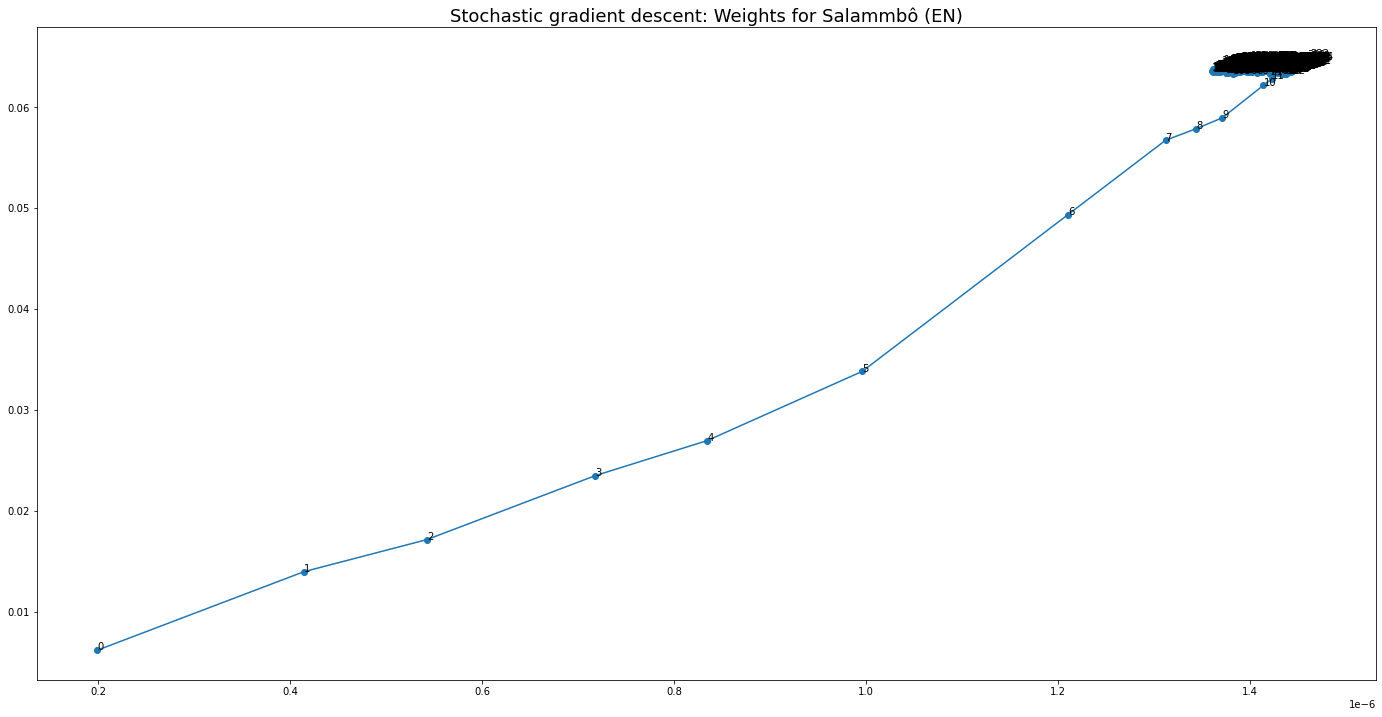

In [41]:
### Plotting weight updates by epoch
logs = sgd.logs
fig = plt.figure(figsize=(24,12))
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title('Stochastic gradient descent: Weights for Salammbô (EN)', fontsize=18)
plt.show()

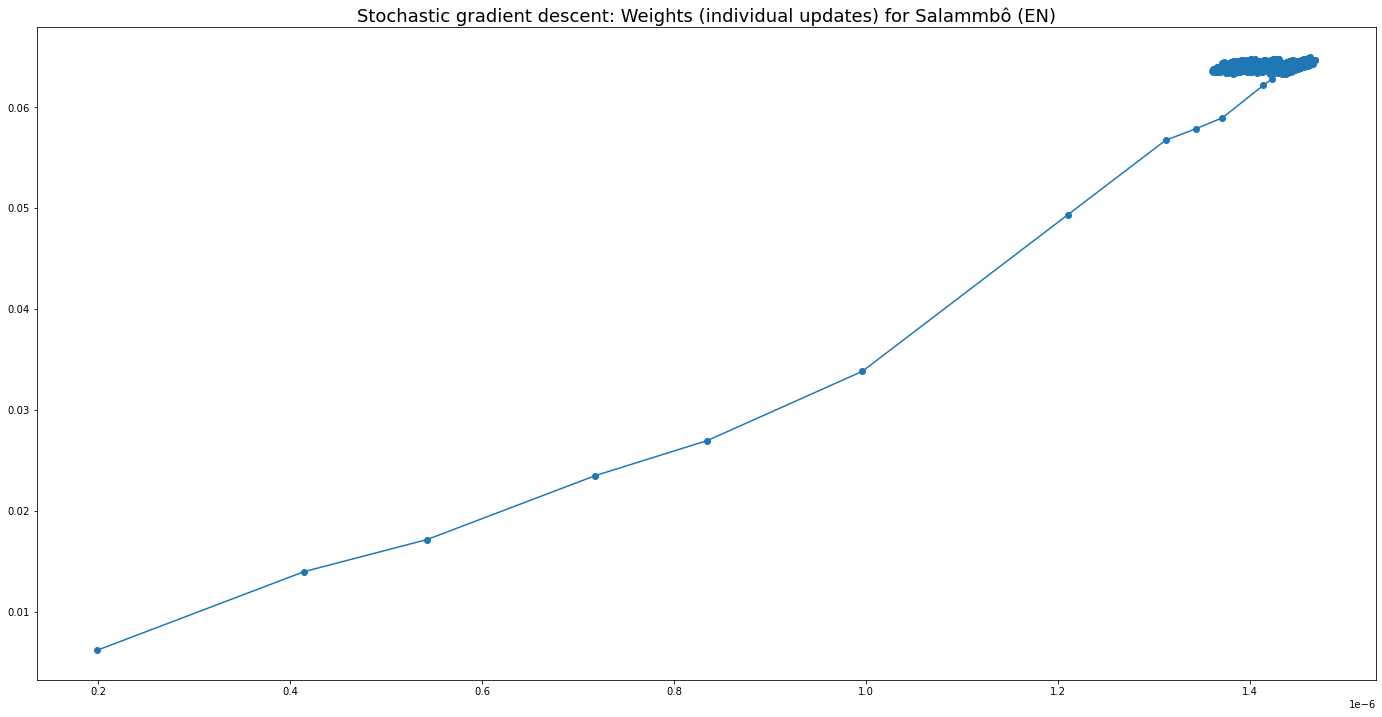

In [42]:
### Plotting weight updates by individual updates
logs = sgd.logs_stoch
fig = plt.figure(figsize=(24,12))
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])),
         marker='o')
plt.title('Stochastic gradient descent: Weights (individual updates) for Salammbô (EN)', fontsize=18)
plt.show()

### 1a. Batch gradient descent
Our gradient equation for $q$ examples becomes:
$$w_0 \leftarrow w_0 + \frac{\alpha}{q}\sum_{j=1}^{q}(y^j - (w_0 + w_1x_1^j))$$
$$w_1 \leftarrow w_1 + \frac{\alpha}{q}\sum_{j=1}^{q}x_1^j \times (y^j - (w_0 + w_1x_1^j))$$

In [43]:
class BatchGradientDescent(LinearClassifier):

    def fit(self, X, y, alpha=1.0, w=None, epochs=10, tol=1e-5, scale_data=False):
        """Performs batch gradient descent.
        
        Updates weights after considering a number of randomly-selected samples 
        in the data set.

        :param X: The observation matrix.
        :param y: The class vector.
        :param alpha: The learning rate.
        :param epochs: Number of full passes over the data set.
        :param tol: The convergence threshold value.
        :param scale_date: Normalises the dataset if True.
        :return: w, the learned weight vector. 
        """

        self.alpha = alpha / len(X)
        self.w = w
        self.tol = tol
        self.scale_data = scale_data
        self.logs = []
        if self.scale_data:
            X, x_max = self.normalize(X)
            y, y_max = self.normalize(y)
            self.maxima = np.concatenate((x_max, y_max))
        for epoch in range(1, epochs):
            w_0 = self.w.copy()
            loss = y - self.predict(X, self.w)
            gradient = X.T @ loss
            self.w = w_0 + self.alpha * gradient
            error = self.compute_sse(X, y, self.w)
            if np.linalg.norm(gradient) < self.tol:
                print("Epoch: ", epoch)
                break
            error = self.compute_sse(X, y, self.w)
            self.logs.extend((self.w, self.alpha, error))
        if self.scale_data:
            self.w = self.denormalize(self.w)
        return self.w

_You will test your program on two data sets corresponding to the letter counts in the 15 chapters of the French and English versions of Salammbô, where the first column is the total count of characters and the second one, the count of A's: [[French]](https://github.com/pnugues/ilppp/blob/master/programs/ch04/salammbo/salammbo_a_fr.tsv)[[English]](https://github.com/pnugues/ilppp/blob/master/programs/ch04/salammbo/salammbo_a_en.tsv)._

In [44]:
### Fetch Salammbô data sets from URL
X_fr, y_fr = load_tsv(file_path_fr)
X_en, y_en = load_tsv(file_path_en)

### Transform data into numpy matrices
X_fr, X_en = np.array(X_fr), np.array(X_en)
y_fr, y_en = np.array([y_fr]).T, np.array([y_en]).T

_Before you start the computation, scale the data so that they fit in the range `[0, 1]` on the x and y axes. Try different values for the learning rate._

In [45]:
scale_data = True                                       # Normalizes the data set if True

In [46]:
### Parameters for batch gradient descent
alpha = 1.0 if scale_data is True else 1e-5             # Learning rate
epochs = 1000                                           # Complete passes over entire data set
tol = 1e-10                                             # Convergence threshold

In [47]:
### Initialising weight vector
w = np.zeros(X_fr.shape[1]).reshape((-1, 1))

### Performing linear regression with BGD on French data set
bgd = BatchGradientDescent()
w = bgd.fit(X_fr, y_fr, alpha, w, epochs, tol, scale_data)

Epoch:  485


Visualize the points as well as the regression lines you obtain using `matplotlib` or another similar program.

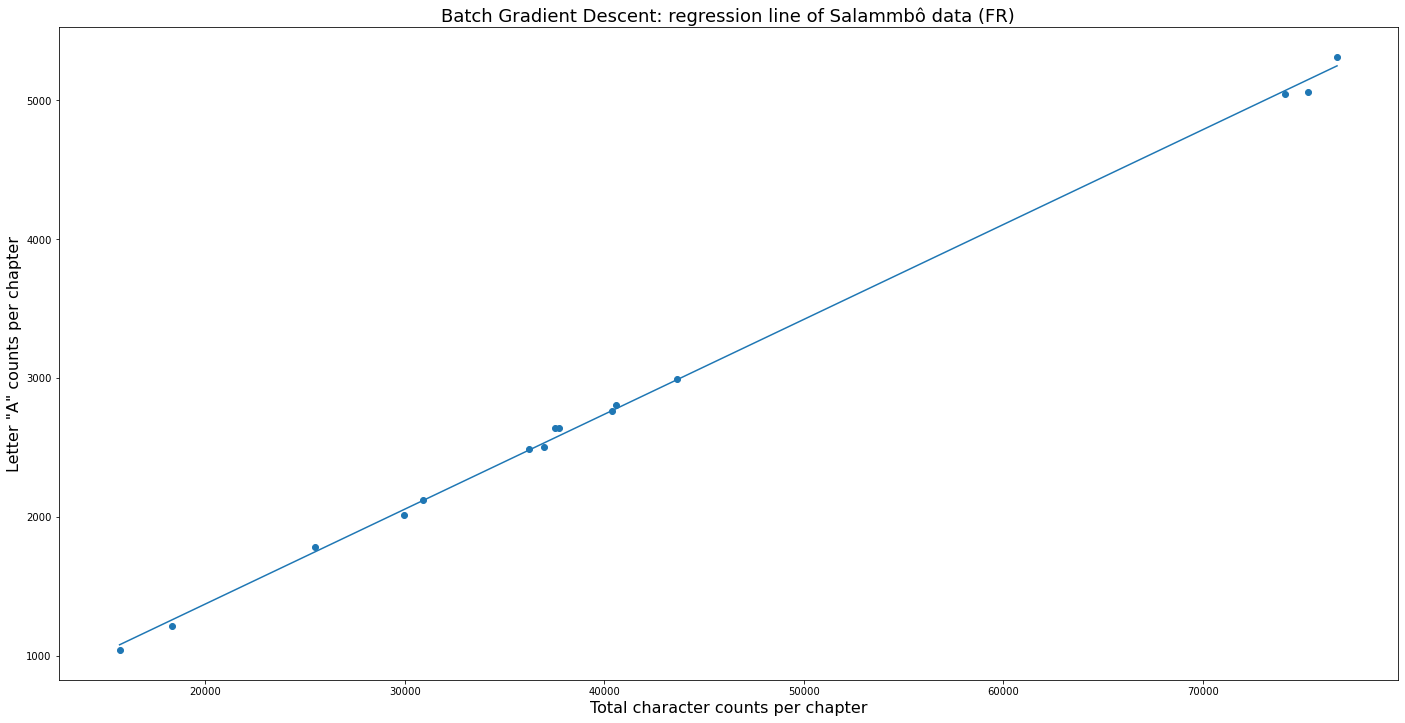

In [48]:
### Visualising the coordinates and the best-fit line 
X_fig = X_fr[:, 1]
y_fig = y_fr[:, 0]
fig = plt.figure(figsize=(24,12))
plt.scatter(X_fig, y_fig)
plt.plot([min(X_fig), max(X_fig)],
         [[1, min(X_fig)] @ w, [1, max(X_fig)] @ w])
plt.title('Batch Gradient Descent: regression line of Salammbô data (FR)', fontsize=18)
plt.xlabel('Total character counts per chapter', fontsize=16)
plt.ylabel('Letter "A" counts per chapter', fontsize=16)
plt.show()

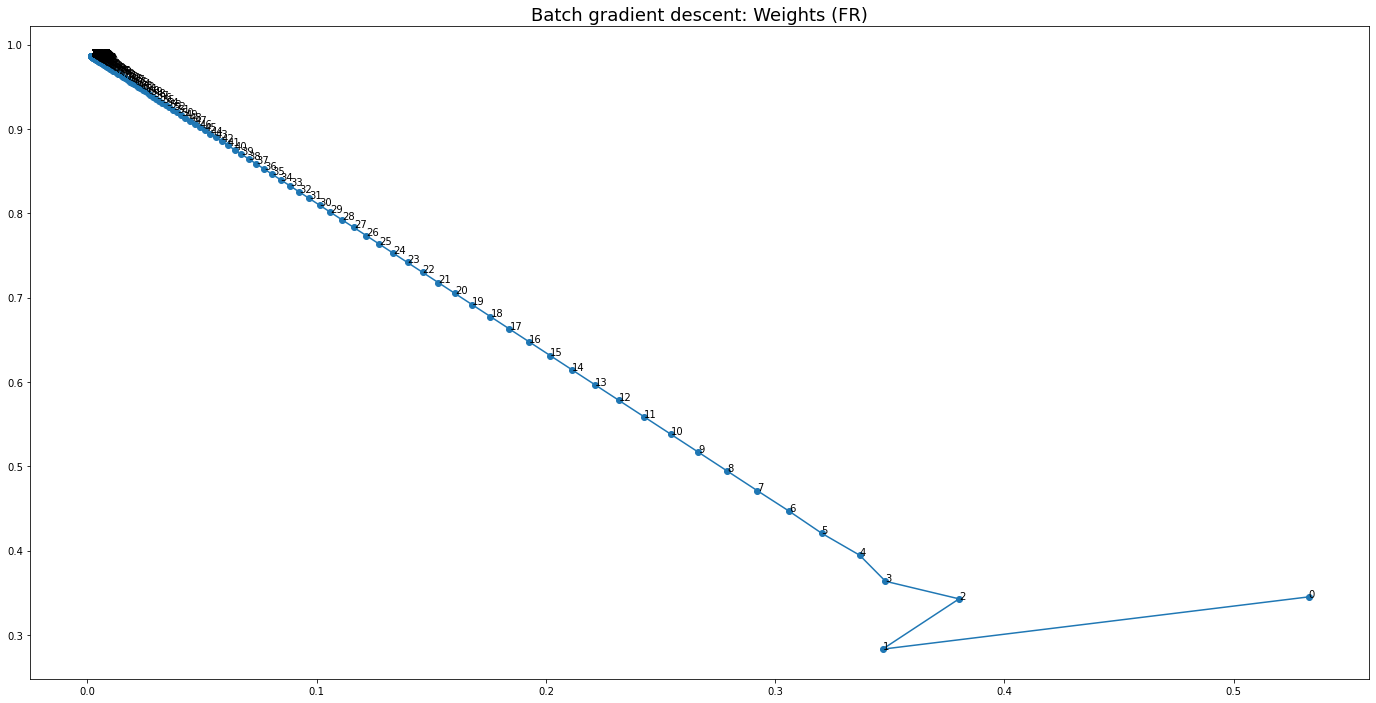

In [49]:
### Plotting weight updates by epoch
logs = bgd.logs
fig = plt.figure(figsize=(24,12))
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title('Batch gradient descent: Weights (FR)', fontsize=18)
plt.show()

In [50]:
### Initialising weight vector
w = np.zeros(X_en.shape[1]).reshape((-1, 1))

### Performing linear regression with BGD on English data set
bgd = BatchGradientDescent()
w = bgd.fit(X_en, y_en, alpha, w, epochs, tol, scale_data)

Epoch:  482


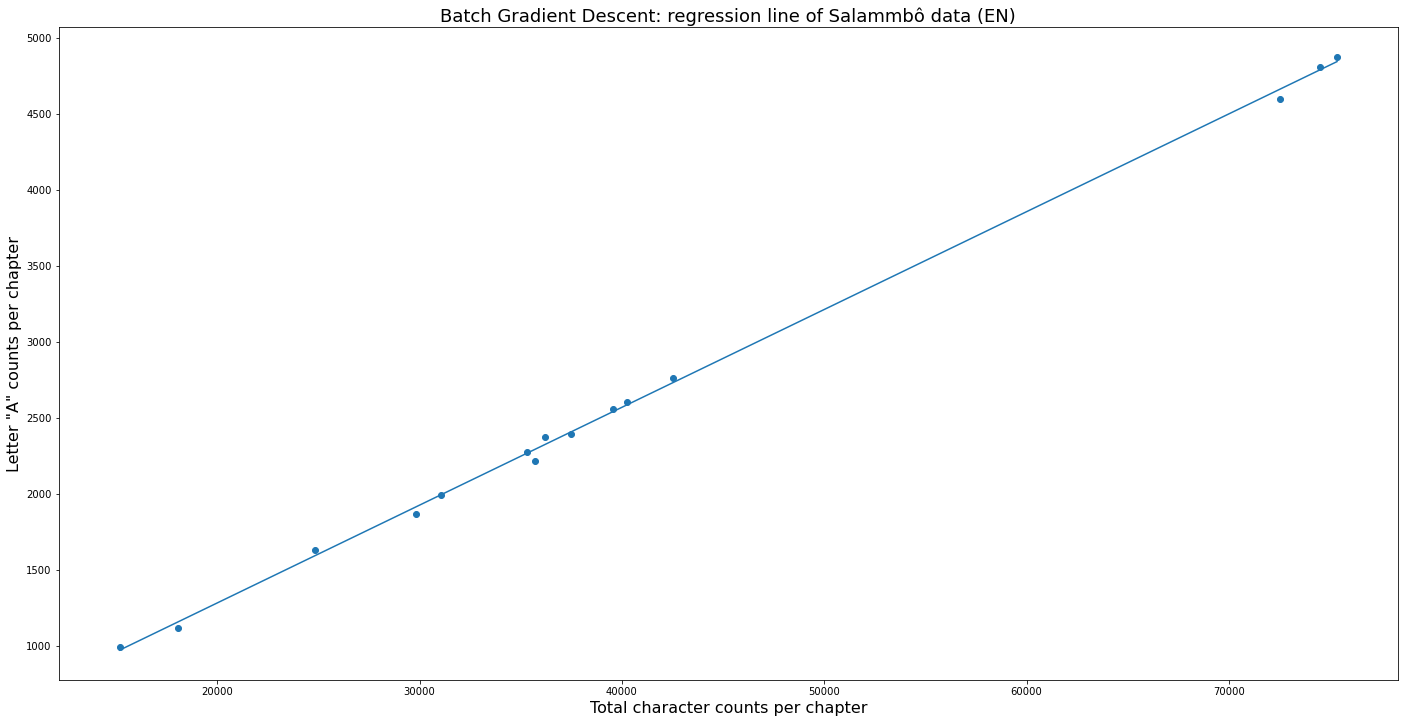

In [51]:
### Visualising the coordinates and the best-fit line 
X_fig = X_en[:, 1]
y_fig = y_en[:, 0]
fig = plt.figure(figsize=(24,12))
plt.scatter(X_fig, y_fig)
plt.plot([min(X_fig), max(X_fig)],
         [[1, min(X_fig)] @ w, [1, max(X_fig)] @ w])
plt.title('Batch Gradient Descent: regression line of Salammbô data (EN)', fontsize=18)
plt.xlabel('Total character counts per chapter', fontsize=16)
plt.ylabel('Letter "A" counts per chapter', fontsize=16)
plt.show()

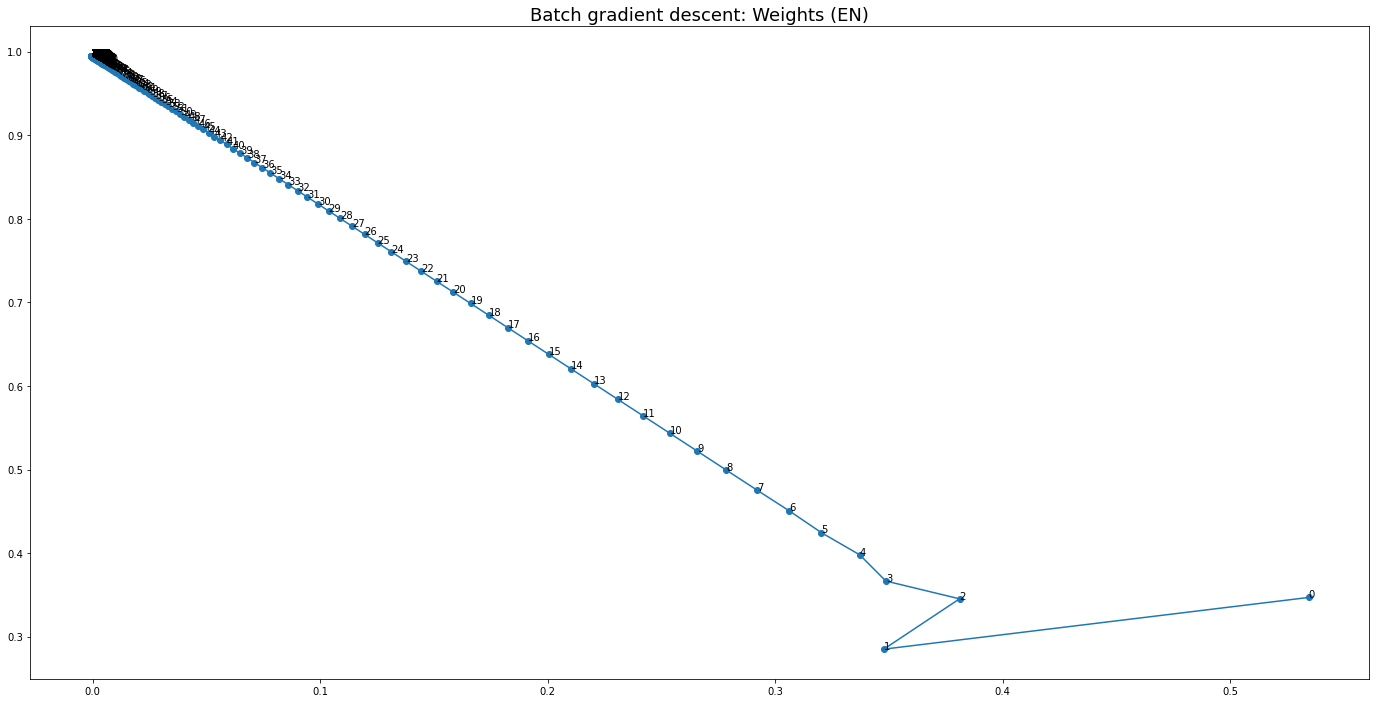

In [52]:
### Plotting weight updates by epoch
logs = bgd.logs
fig = plt.figure(figsize=(24,12))
plt.plot(list(map(lambda pair: pair[0], logs[0::3])), list(map(lambda pair: pair[1], logs[0::3])), marker='o')
for i in range(len(logs[0::3])):
    plt.annotate(i, xy=logs[0::3][i])
plt.title('Batch gradient descent: Weights (EN)', fontsize=18)
plt.show()

## 2. The Perceptron
_You will use the same data set as for linear regression. You will encode the classes and the features using the LIBSVM format, also called SVMLight. This format is a standard way to encode data sets and you can find a description [here](https://github.com/cjlin1/libsvm/blob/master/README). You can also read details on the [sparse matrix format](http://www.csie.ntu.edu.tw/~cjlin/libsvm/faq.html#/Q3:_Data_preparation) as a complement. The complete LIBSVM program is available from this page: https://csie.ntu.edu.tw/~cjilin/libsvm/. You do not need this program in the assignment. You just need to read the description of the data format._

_Write the perceptron program as explained in AIMA pp.723-725 and in the slides and run it on your data set._

_As a stop criterion, you will use the number of misclassified examples._

Perceptron is a linear classifier that works the same way as a neural network but without any hidden layers (just input and output layers). First, the Perceptron trains its weights given a dataset, which it can then use to classify a new input by running it through the network.

The input layer consists of features (attributes) while the output layer consists of nodes (also called neurons). Each node in the output layer has $n$ synapses (one for every feature), each with their own weight $w$.

Each node in the output layer computes a dot product between the synapse weights and their corresponding input features. The result of this linear function is passed through an activation function and the index of the largest value is returned. In classification problems, each neuron (node) represents a class. The final classification is the class/node with the max output value.


The perceptron learning rule governs the update of weight values according to the three possible outcomes for a prediction $h_w(x) = \hat{y} $ and its true value $y$ (AIMA p.724):
* If the output is correct, i.e., $y = h_w(x)$ then the weights are not changed.
* If $y$ is $1$ but $h_w(x)$ is $0$, then $w_i$ is _increased_ when the corresponding input $x_i$ is positive and _decreased_ when $x_i$ is negative. This makes sense, because we want to make $w \cdot x$ bigger so that $h_w(x)$ outputs a $1$.
* If $y$ is $0$ and $h_w(x)$ is $1$, then $w_i$ is _decreased_ when the corresponding input $x_i$ is positive and _increased_ when $x_i$ is negative. This makes sense, because we want to make $w \cdot x$ smaller so that $h_w(x)$ outputs a $0$.


In [53]:
class Perceptron(LinearClassifier):
    
    def schedule(self, t):
        """Performs annealing of the learning rate.
        
        :param t: The current timestep.
        :return: The annealed learning rate for the current timestep.
        """
        total_steps = int(len(X) / self.batch_size) * self.epochs
        scale_factor = 0.01
        return (total_steps * scale_factor) / (total_steps * scale_factor + t)
    
    @staticmethod
    def threshold(x, w):
        """The threshold function, i.e., the classification hypothesis."""
        if (x @ w)[0] >= 0:
            return 1
        else:
            return 0

    def fit(self, X, y, w, alpha, epochs=10, batch_size=1, tol=0, scale_data=False, randomize=False, decay=False):
        """Performs linear classification with the perceptron learning rule.

        :param X: The observation matrix.
        :param y: The class vector.
        :param w: The weight vector.
        :param alpha: The learning rate.
        :param epochs: Number of full passes over the data set.
        :param batch_size: Number of samples to consider before a weight update.
        :param tol: Convergence threshold value.
        :param scale_data: Scales the data set with min-max scaling if True.
        :param randomize: Randomizes the samples chosen at each iteration.
        :param decay: if True, the learning rate is annealed at each iteration.
        :return: w, the learned weight vector.
        """

        self.w = w
        self.alpha = alpha / len(X)
        self.epochs = epochs
        self.batch_size = batch_size
        self.tol = tol
        self.scale_data = scale_data
        self.randomize = randomize
        self.decay = decay
        self.logs = []
        if self.scale_data:
            X, x_max = self.normalize(X)
            y, y_max = self.normalize(y)
            self.maxima = np.concatenate((x_max, y_max))
        t = 0       # Timestep counter
        for epoch in range(1, int(X.shape[0] / self.batch_size) * self.epochs):
            # Shuffle indexes if true
            if self.randomize:
                idxs = np.random.choice(np.arange(X.shape[0]), size=self.batch_size)
            else:
                n_splits = int(len(X) / self.batch_size)
                idxs = np.array_split(range(len(X)), n_splits)
            error = 0
            for i in idxs:
                w_0 = self.w
                loss = y[i] - self.threshold(X[i, :], self.w)
                if self.randomize:
                    gradient = loss * X[i, :]
                else:
                    gradient = X[i, :].T @ loss
                if self.decay:
                    # Update learning rate for current timestep
                    self.alpha = self.schedule(t)
                self.w = w_0 + self.alpha * gradient
                error += np.sum(np.abs([loss]))
                t += 1
            self.logs.extend((self.w, self.alpha, error))
            if error <= self.tol:
                print("Epoch", epoch)
                break
        if self.scale_data:
            self.w = self.denormalize(self.w)
        return w

_Write a reader function for the LIBSVM format and scale the data in your set. You can write a simplified reader that assumes all the attributes, including zeros, will have an index, i.e. ignore the sparse format._

In [54]:
### From P. Nugues' `datasets.py`
# Credit: https://github.com/pnugues/ilppp/blob/master/programs/ch04/python/datasets.py

In [55]:
def read_libsvm_file(file_path):
    """
    Read a libsvm file. The format is not sparse.

    Each row of the data set has the following format:
    data[0] : language tag (0 = FR, 1 = EN)
    data[1] : total letter count per chapter
    data[2] : count of letter 'A' per chapter

    :param file_path: URL of libsvm-formatted data set.
    :return: X, y as lists
    """
    data = urlopen(file_path).read().decode('utf-8').strip().split('\n')
    observations = [data[i].split() for i in range(len(data))]
    y = [float(obs[0]) for obs in observations]
    # We add the intercept
    X = [['0:1'] + obs[1:] for obs in observations]
    # Get values in second and third columns following a semicolon (the counts)
    X = [list(map(lambda x: float(x.split(':')[1]), obs)) for obs in X]
    return X, y

In [56]:
### Fetch the Salammbô data set as a libsvm file
file_path_libsvm = "https://raw.githubusercontent.com/pnugues/ilppp/master/programs/ch04/salammbo/salammbo_a_binary.libsvm"
X, y = read_libsvm_file(file_path_libsvm)
### Converting to Numpy arrays
X = np.array(X)
y = np.array([y]).T

In [57]:
### Parameters for perceptron classifier
randomize = True                                        # Shuffle the data
scale_data = True                                       # Normalizes the data if True
alpha = 1e-3 if scale_data else 1e-5                    # Learning rate
epochs = 10000                                          # Complete passes over entire data set
batch_size = 1                                          # Using a online stochastic approach
tol = len(X) * -1.00                                    # Convergence threshold (1% of data set)

With a batch size equal to 1, we will perform a gradient and weight update step every time a single example is considered.

In [58]:
### Fitting the Perceptron classifier on Salammbô data set
w = np.ones(X.shape[1]).reshape((-1, 1))
perceptron = Perceptron()
w = perceptron.fit(X, y, w, alpha, epochs, batch_size, tol, scale_data, randomize)

_Report the results of the classification and the parameters you have used._

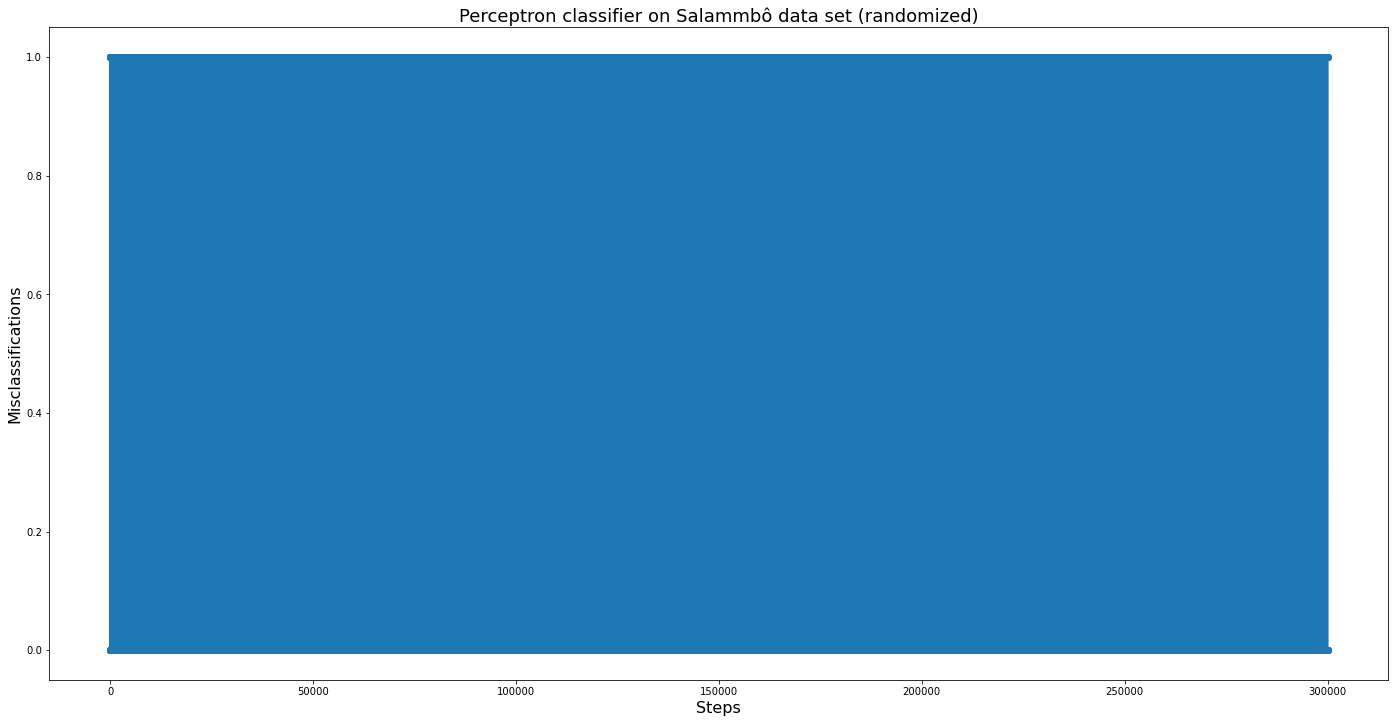

In [59]:
### Visualising the misclassifications for randomly selected training examples
logs = perceptron.logs
fig = plt.figure(figsize=(24,12))
plt.scatter(range(len(logs[2::3])), logs[2::3])
plt.plot(range(len(logs[2::3])), logs[2::3])
plt.title('Perceptron classifier on Salammbô data set (randomized)', fontsize=18)
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Misclassifications', fontsize=16)
plt.show()

Even after an impressive 100,000 epochs, the perceptron classifier fails to converge – but why? Given that the Salammbô data set is indeed linearly separable, it is fair to assume that the perceptron learning rule will converge to a perfect linear seperator. For a batch size of 1, with over 100,000 epochs we know that each sample was seen 33,333.33 times on average.

To solve this, we can introduce two possibile modifications to our previous approach. The first is implement a batch learning approach. We will select a batch size equal to $1/2$ of the data set. A more robust approach is to introduce a learning rate decay that satisfies the conditions:
$$\sum_{t=1}^{\infty}\alpha(t) = \infty, \qquad \textrm{and} \qquad \sum_{}^{} \alpha^{2}(t) < \infty.$$

We will see that the learning rate decay function given by $\alpha(t) = n/(n + t)$ for $n$ epochs and a timestep $t$ arrives at a much better (albeit non-optimal) solution.

We will tolerate a $1\%$ misclassification error before stopping the model. In terms of our data set of $30$ examples, that's $1/30$ misclassifications per epoch before stopping.

In [60]:
### Parameters for perceptron classifier
randomize = False                                        # Does not shuffle the data
batch_size = int(len(X) * 0.5)                           # Using a mini-batch approach
scale_data = True                                        # Normalizes the data if True
alpha = 1e-3 if scale_data else 1e-5                     # Learning rate
epochs = 10000                                           # Complete passes over entire data set
tol = -1                                                 # Convergence threshold (does not halt)

In [61]:
### Fitting the perceptron classifier on Salammbô data set
w = np.ones(X.shape[1]).reshape((-1, 1))
perceptron = Perceptron()
w = perceptron.fit(X, y, w, alpha, epochs, batch_size, tol, scale_data, randomize)

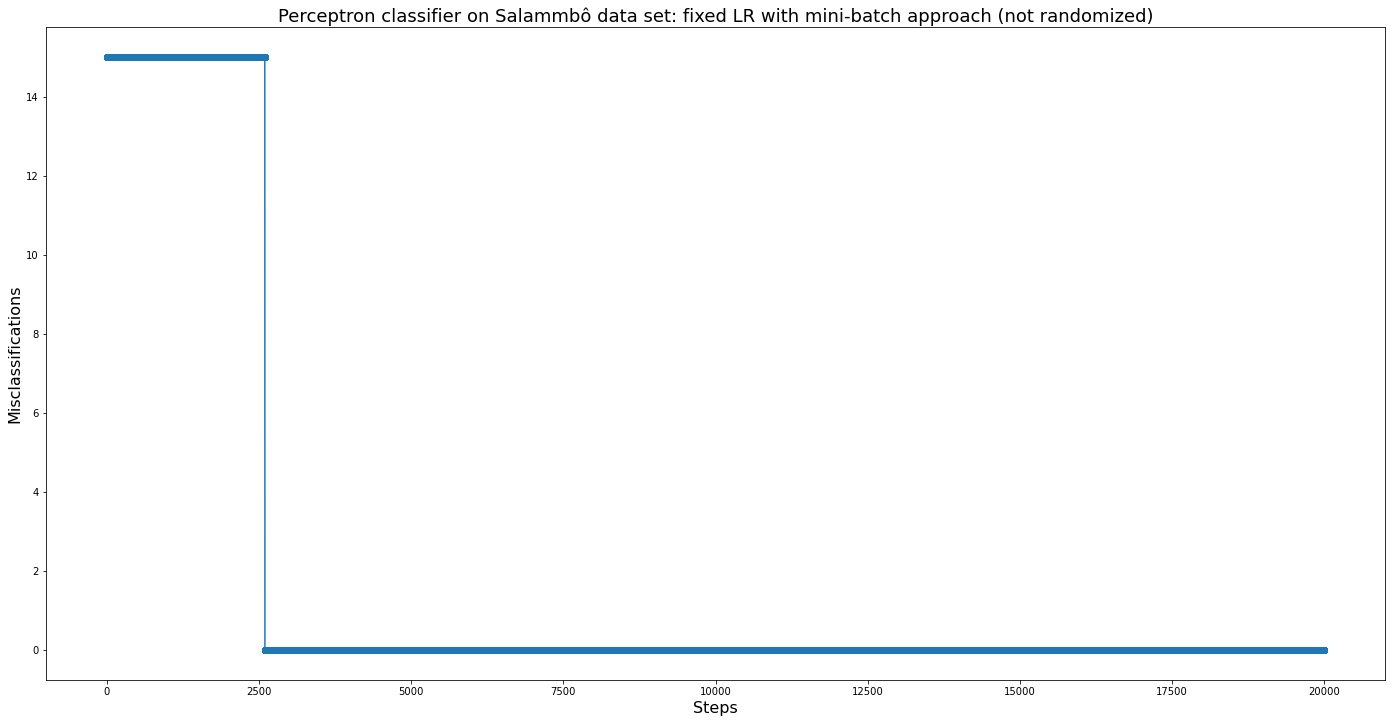

In [62]:
### Visualising the misclassifications
logs = perceptron.logs
fig = plt.figure(figsize=(24,12))
plt.scatter(range(len(logs[2::3])), logs[2::3])
plt.plot(range(len(logs[2::3])), logs[2::3])
plt.title('Perceptron classifier on Salammbô data set: fixed LR with mini-batch approach (not randomized)', fontsize=18)
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Misclassifications', fontsize=16)
plt.show()

After just 2000 epochs we have a model that correctly splits the data roughly 93% of the time. We see in the above that the number of misclassifications dropped to just below 7% on the 2000th epoch.

We will now consider the learning rate decay approach while maintaining a stochastic weight update approach.

In [63]:
### Parameters for perceptron classifier
randomize = False                                       # Does not shuffle the data
batch_size = 1                                          # Using a stochastic approach
decay = True                                            # Learning rate decays to zero if True
scale_data = True                                       # Normalizes the data if True
alpha = 1e-3 if scale_data is True else 1e-5            # Learning rate if decay is False
epochs = 1000                                           # Complete passes over entire data set
tol = np.ceil(len(X) * 0.01)                            # Convergence threshold (1% misclassifications)

In [64]:
### Fitting the perceptron classifier on Salammbô data set
w = np.ones(X.shape[1]).reshape((-1, 1))
perceptron = Perceptron()
w = perceptron.fit(X, y, w, alpha, epochs, batch_size, tol, scale_data, randomize, decay)

Epoch 726


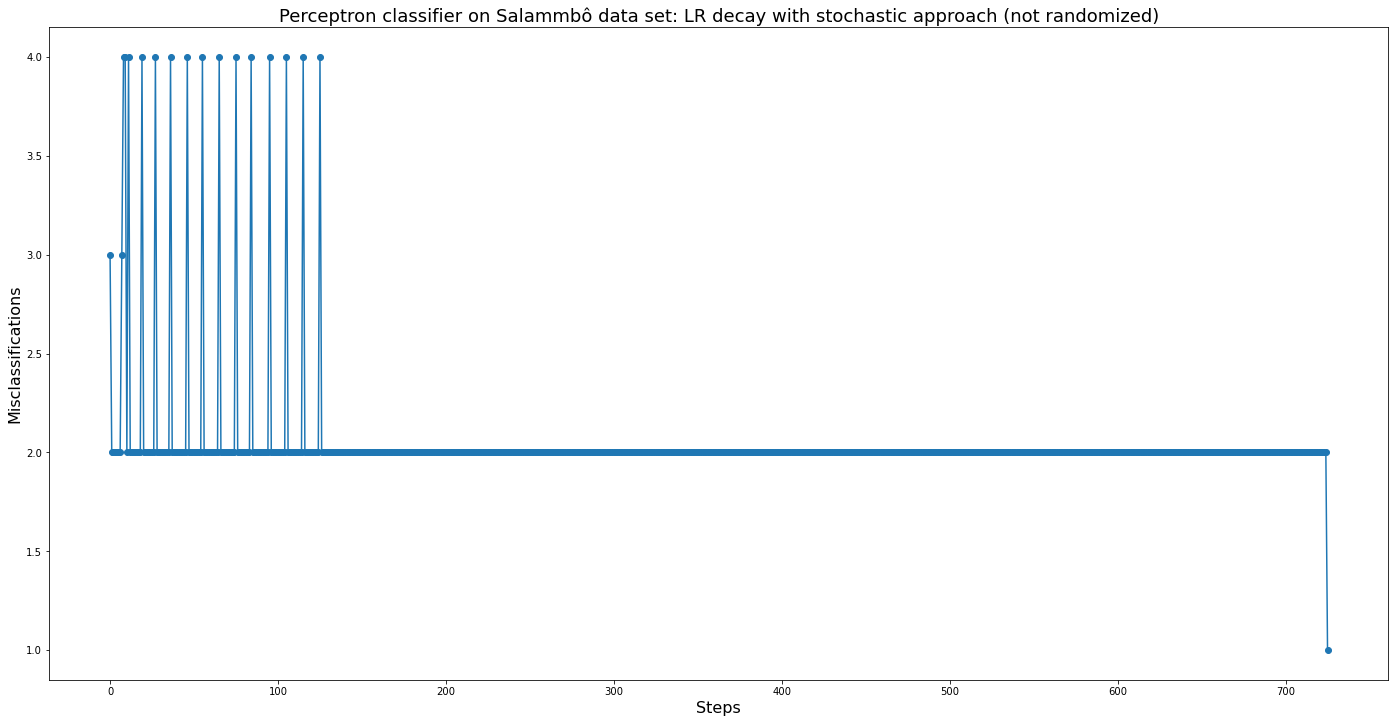

In [65]:
### Visualising the misclassifications
logs = perceptron.logs
fig = plt.figure(figsize=(24,12))
plt.scatter(range(len(logs[2::3])), logs[2::3])
plt.plot(range(len(logs[2::3])), logs[2::3])
plt.title('Perceptron classifier on Salammbô data set: LR decay with stochastic approach (not randomized)', fontsize=18)
plt.xlabel('Steps', fontsize=16)
plt.ylabel('Misclassifications', fontsize=16)
plt.show()

In [66]:
### Visualising the rate of decay of alpha, the learning rate

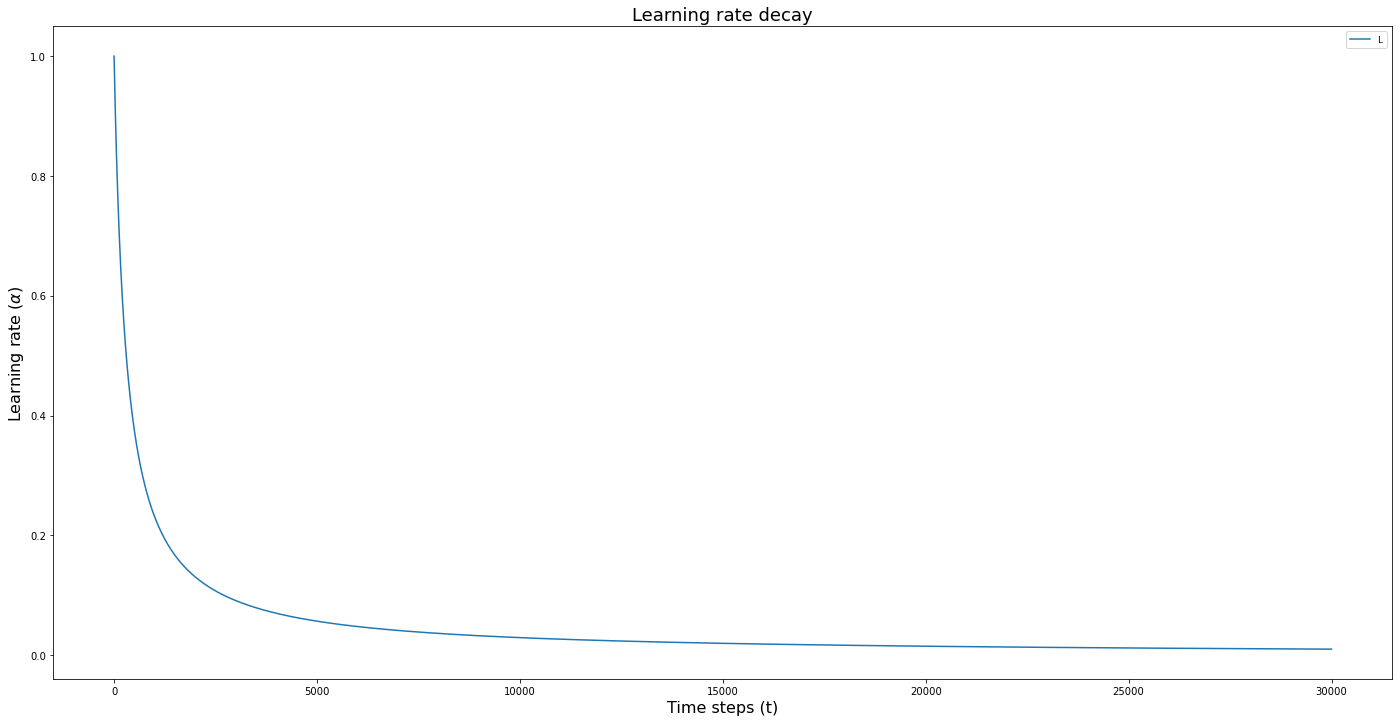

In [67]:
fig = plt.figure(figsize=(24,12))
lr = [perceptron.schedule(t) for t in range(int(len(X) / perceptron.batch_size) * perceptron.epochs)]
plt.plot(range(len(lr)), lr)
plt.title('Learning rate decay', fontsize=18)
plt.xlabel(r'Time steps (t)', fontsize=16)
plt.rcParams['text.usetex'] = True
plt.ylabel(r'Learning rate ($\alpha$)', fontsize=16)
plt.legend(r'LR(t) = \frac{b}{(b + t)} \quad b = 0.01 * n_steps')

Evaluate your perceptron using the leave-one-out cross validation method. You will have to train and run 30 models. In each train/run session, you will train on 29 samples and evaluate on the remaining sample. You have a correct or wrong classification. You will sum these classifications, i.e. the number of correct or wrong classifications, to get your final evaluation.

In [68]:
from sklearn.model_selection import KFold

In [69]:
leave_one_out = KFold(n_splits=X.shape[0])

In [70]:
### Parameters for perceptron classifier
randomize = False                                       # Does not shuffle the data
batch_size = 1                                          # Using a stochastic approach
decay = True                                            # Learning rate decays to zero if True
scale_data = True                                       # Normalizes the data if True
alpha = 1e-3 if scale_data is True else 1e-5            # Learning rate if decay is False
epochs = 1000                                           # Complete passes over entire data set
tol = np.ceil(len(X) * 0.01)                            # Convergence threshold (1% misclassifications)

In [71]:
### Evaluating the perceptron classifier with K-Fold cross validation (leave-one-out)
misclassifications = []
for train_idxs, test_idxs in leave_one_out.split(X):
    X_train, y_train = X[train_idxs,:], y[train_idxs,:]
    X_test, y_test = X[test_idxs,:], y[test_idxs,:]
    w = np.ones(X.shape[1]).reshape((-1, 1))
    # Fitting the perceptron classifier on Salammbô training set
    perceptron = Perceptron()
    w = perceptron.fit(X_train, y_train, w, alpha, epochs, batch_size, tol, scale_data, randomize, decay)
    # Normalising the test data
    X_test /= perceptron.maxima[:3]
    # Evaluating on the test set
    y_pred = [abs(y_test[i] - perceptron.threshold(X_test[i, :], w)) for i in range(len(X_test))]
    # Number of misclassifications
    misclassifications.append(sum(y_pred))

Epoch 225
Epoch 1372
Epoch 1330
Epoch 1205
Epoch 1205
Epoch 1205
Epoch 1885
Epoch 1671
Epoch 1671
Epoch 1565
Epoch 590
Epoch 1717
Epoch 1717
Epoch 1453
Epoch 1776
Epoch 72
Epoch 711
Epoch 1919
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1787
Epoch 1022
Epoch 1787


Text(0, 0.5, 'Misclassifications')

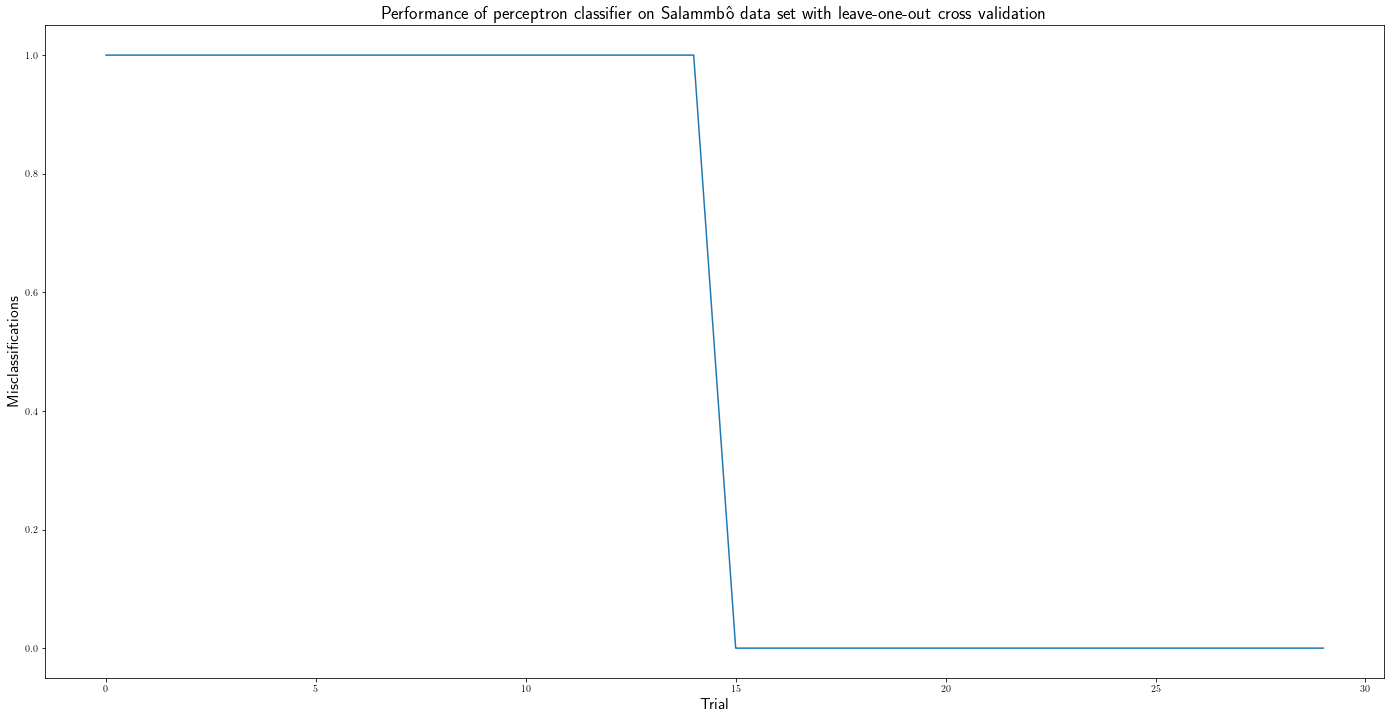

In [72]:
### Evaluating the model with K-Fold cross validation (leave-one-out)
fig = plt.figure(figsize=(24,12))
plt.plot(range(len(misclassifications)), misclassifications)
plt.title('Performance of perceptron classifier on Salammbô data set with leave-one-out cross validation', fontsize=18)
plt.xlabel('Trial', fontsize=16)
plt.ylabel('Misclassifications', fontsize=16)

## 3. Logistic Regression
From your perceptron program, implement logistic regression. You can either follow the description from the textbook, S. Russel and R. Norvig, _Artificial Intelligence_, 2010 pp. 725-727, or the slides. You can either implement the stochastic or the batch version of the algorithm, or both versions. Run the resulting program on your data set.

In [73]:
class LogisticRegression(LinearClassifier):
    
    
    def schedule(self, t):
        """Performs annealing of the learning rate.
        
        :param t: The current timestep.
        :return: The annealed learning rate for the current timestep.
        """
        
        total_steps = self.batch_size * self.epochs
        scale_factor = 0.01
        return (total_steps * scale_factor) / (total_steps * scale_factor + t)

    @staticmethod
    def sigmoid(x, w):
        """The continuous logistic function for soft decision boundaries.
        
        :return: float, Hypothesis decision boundary.
        """
        
        return float(1.0 / (1.0 + np.exp(-1.0 * (x @ w))))
    
    def fit(self, X, y, w, alpha, epochs=10, batch_size=1, tol=0, scale_data=False, randomize=False, decay=False):
        """Performs linear classification with logistic regression.
        
        The threshold function, sigmoid, forms a soft hypothesis decision boundary.

        :param X: The observation matrix.
        :param y: The class vector.
        :param w: The weight vector.
        :param alpha: The learning rate.
        :param epochs: Number of full passes over the data set.
        :param batch_size: Number of samples to consider before a weight update.
        :param tol: Convergence threshold value.
        :param scale_data: Scales the data set with min-max scaling if True.
        :param randomize: Randomizes the samples chosen at each iteration.
        :param decay: if True, the learning rate is annealed at each iteration.
        :return: w, the learned weight vector.
        """

        self.w = w
        self.alpha = alpha / len(X)
        self.epochs = epochs
        self.batch_size = batch_size
        self.tol = tol
        self.scale_data = scale_data
        self.randomize = randomize
        self.decay = decay
        self.logs = []
        if self.scale_data:
            X, x_max = self.normalize(X)
            y, y_max = self.normalize(y)
            self.maxima = np.concatenate((x_max, y_max))
        t = 0       # Timestep counter
        for epoch in range(1, int(X.shape[0] / self.batch_size) * self.epochs):
            # Shuffle indexes if true
            if self.randomize:
                idxs = np.random.choice(np.arange(X.shape[0]), size=self.batch_size)
            else:
                n_splits = int(len(X) / self.batch_size)
                idxs = np.array_split(range(len(X)), n_splits)
            error = 0
            for i in idxs:
                w_0 = self.w
                if self.randomize:
                    h_w = np.array([self.sigmoid(X[i, :], self.w)])
                else:
                    h_w = np.array([self.sigmoid(X[j,:], w) for j in i]).T
                loss = y[i].T - h_w
                if self.decay:
                    # Update learning rate for current timestep
                    self.alpha = self.schedule(t)
                #self.w = w_0 + self.alpha * gradient
                self.w = w_0 + self.alpha * loss * h_w * (1.0 - h_w) * X[i, :]
                error += np.sum(np.abs([loss]))
                t += 1
            self.logs.extend((self.w, self.alpha, error))
            if error <= self.tol:
                print("Epoch", epoch)
                break
        if self.scale_data:
            self.w = self.denormalize(self.w)
        return w

Evaluate your logistic regression using the leave-one-out cross validation method as with the perceptron.

In [74]:
### Parameters for logistic regression classifier
randomize = False                                       # Shuffle the data
batch_size = 1                                          # Using a stochastic approach
decay = True                                            # Learning rate decays to zero
scale_data = True                                       # Normalizes the data if True
alpha = 1e-3 if scale_data is True else 1e-5            # Learning rate
epochs = 100                                            # Complete passes over entire data set
tol = np.ceil(len(X) * 0.01)                            # Convergence threshold (1% misclassifications)

In [75]:
### Evaluating the logistic regression classifier with K-Fold cross validation (leave-one-out)
scores = []
for train_idxs, test_idxs in leave_one_out.split(X):
    X_train, y_train = X[train_idxs,:], y[train_idxs,:]
    X_test, y_test = X[test_idxs,:], y[test_idxs,:]
    w = np.ones(X_train.shape[1]).reshape((-1, 1))
    # Fitting the logistic regression classifier on Salammbô training set
    logreg = LogisticRegression()
    w = logreg.fit(X_train, y_train, w, alpha, epochs, batch_size, tol, scale_data, randomize, decay)
    # Normalising the test data
    X_test /= logreg.maxima[:3]
    # Evaluating on the test set
    y_pred = [1 if (abs(logreg.sigmoid(X_test[i, :], w)) > 0.5) else 0 for i in range(len(X_test))]
    # Number of correct predictions
    scores.append(sum(y_pred))

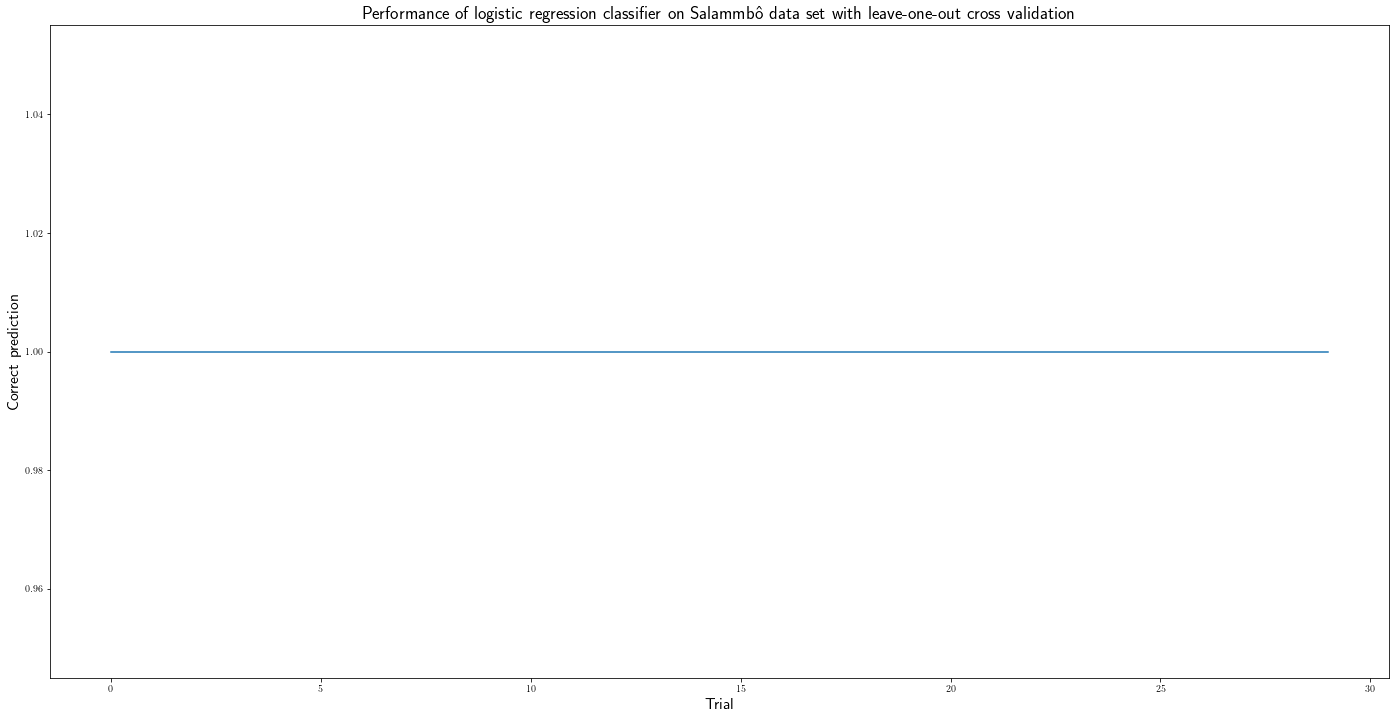

In [76]:
### Evaluating the model with K-Fold cross validation (leave-one-out)
fig = plt.figure(figsize=(24,12))
plt.plot(range(len(scores)), scores)
plt.title('Performance of logistic regression classifier on Salammbô data set with leave-one-out cross validation', fontsize=18)
plt.xlabel('Trial', fontsize=16)
plt.ylabel('Correct prediction', fontsize=16)
plt.show()

In [77]:
print("Accuracy:", str((sum(scores) / len(scores) * 100)) + "%")

Accuracy: 100.0%


## Credits
This assignment was prepared by P. Nugues et al., VT2019 (link [here](https://github.com/pnugues/edap01/blob/eaa8a12b3150e0168152e1356083aecc2c926666/assignments/perceptron.md)).

Most of the theory behind gradient descent and regression comes from P. Nugues' _EDAF70 - Lecture 8_ (slides available [here](https://github.com/pnugues/edap01/blob/eaa8a12b3150e0168152e1356083aecc2c926666/slides/EDAF70_ML_slides02.pdf)).

Information on the Perceptron classifier comes from the AIMA companion notebook (available [here](https://notebook.community/aimacode/aima-python/learning)).

See also _Artificial Intelligence: A Modern Approach 3/e_. Stuart Russell and Peter Norvig. pp.719-720 (2010).